<a href="https://colab.research.google.com/github/gcarmonav/Actividad-7/blob/main/Copia_de_Optimizaci%C3%B3n_y_redes_neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 08: optimización y redes neuronales
###Decisiones bajo incertidumbre

Por:

Giovanna Andrea Carmona Valencia cc. 39.193.395

Hilber Garcia López cc. 83.091.440

## 1. Planteamiento



###1.1. Objetivo
Afianzar los conocimientos de optimización numérica y su importancia en el entrenamiento de modelos de aprendizaje de máquina.

Para ello se considera el tutorial de reconocimiento de dígitos con el conjunto de datos MNIST de la Guia inicial de TensorFlow 2.0 para principiantes.






###1.2. Dataset utilizado

El dataset MNIST es un conjunto de datos desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges para la evaluación de modelos de aprendizaje de máquinas sobre el problema de la clasificación de los dígitos escritos a mano, su nombre significa Modified NIST. La base de datos se construyó a partir de varios conjuntos de datos de documentos escaneados disponibles en la carpeta Instituto Nacional de Estándares y Tecnología (NIST).

Este dataset se encuentra compuesto por una serie de imágenes de dígitos escritos a mano alzada, entre 0 y 9. Cada dígito está representado por una imagen en blanco y negro de 28 x 28 pixeles, estas imágenes fueron tomadas de documentos escaneados, normalizados en tamaño y centrado. Esto lo convierte en un excelente conjunto de datos para evaluar modelos, permitiendo al desarrollador centrar el aprendizaje de la máquina con muy poca limpieza de datos. 

Para empezar la actividad, instalamos TensorFlow y las librerías a utilizar

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import numpy as np
import pandas as pd

Cargamos y exploramos el dataset con el que se va a trabajar:


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


Validamos las dimensiones de los vectores de entrenamiento y prueba:

In [3]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (60000, 28, 28)
y_train: (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


El conjunto de entrenamiento contiene 60.000 imágenes mientras que el de pruba contiene 10.000. La dimensión de x_train y x_test es de 28 x 28 pixeles, mientas que el y_train y y_test es de dimensión 1 correspondiente a las etiquetas de las imagenes.

A continuación visualizamos algunas imágenes del dataset:

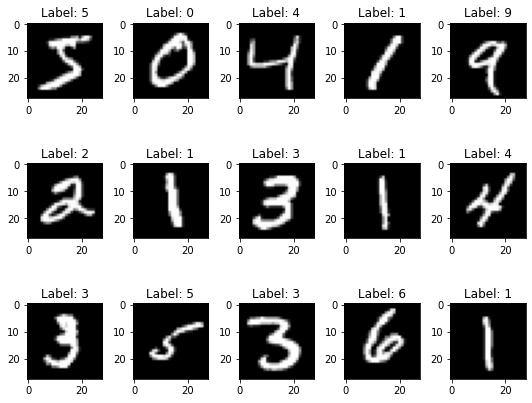

In [4]:
num = 15
images = x_train[:num]
labels = y_train[:num]

num_row = 3
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

##2. Solución

###2.1. Función de pérdida

Reproduzca el tutorial citado completándolo con la fórmula matemática de la función de pérdida

En el desarrollo de cada optimizador se incluyó la función de pérdida "sparse_categorical_crossentropy" debido a que en el dataset las clases son mutuamente excluyentes. Su fórmula matemática es: 

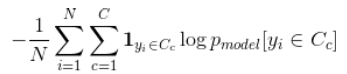






La doble suma está sobre las observaciones $i$ , cuyo número es $N$, y las categorías $c$, cuyo número es $C$. El término $1_ {y_i \ in C_c}$ es la función indicadora de la observación $i$esima perteneciente a la categoría $c$esima. El $p_ {modelo} [y_i \ en C_c]$ es la probabilidad predicha por el modelo de que la observación $i$ esima pertenezca a la categoría $c$esima. Cuando hay más de dos categorías, la red neuronal genera un vector de probabilidades $C$, cada una de las cuales da la probabilidad de que la entrada de la red deba clasificarse como perteneciente a la categoría respectiva.

###2.2. Métodos de optimización

El entrenamiento con un alto volúmen de imágenes tiene a producir buenos resultados independiente del optimizador. Cambie el método de optimización por

- SGD
- RSMprop
- Adagram
- Adadelta

En cada caso varíe la tasa de aprendizaje η=0.001,0.1,0.5,0.9,1.5  manteniendo los otros parámetros del optimizador en sus valores por defecto. Reporte el accuracy en el conjunto de datos en entrenamiento y validaciónn (los 10,000 datos). Reporte las gráficas de la función de pérdida y del accuracy durante el proceso de optimización.

###2.2.1.Descenso de gradiente estocástico - SGD


El SGD se refiere al descenso de gradiente de mini lotes, es decir, un lote de muestras se selecciona al azar y los parámetros se actualizan en función de esto.

Cuando trabaja por lotes o minibach acelera el proceso de entrenamiento de las redes neuronales y no pierde demasiada precisión

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7365 - accuracy: 0.5132 - val_loss: 1.2118 - val_accuracy: 0.7642
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0351 - accuracy: 0.7473 - val_loss: 0.7835 - val_accuracy: 0.8298
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7737 - accuracy: 0.7966 - val_loss: 0.6147 - val_accuracy: 0.8563
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6538 - accuracy: 0.8225 - val_loss: 0.5286 - val_accuracy: 0.8730
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5819 - accuracy: 0.8381 - val_loss: 0.4756 - val_accuracy: 0.8833
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5343 - accuracy: 0.8510 - val_loss: 0.4399 - val_accuracy: 0.8901
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5022 - accuracy: 0.8597 - val_loss: 0.4138 - val_accuracy: 0.8947

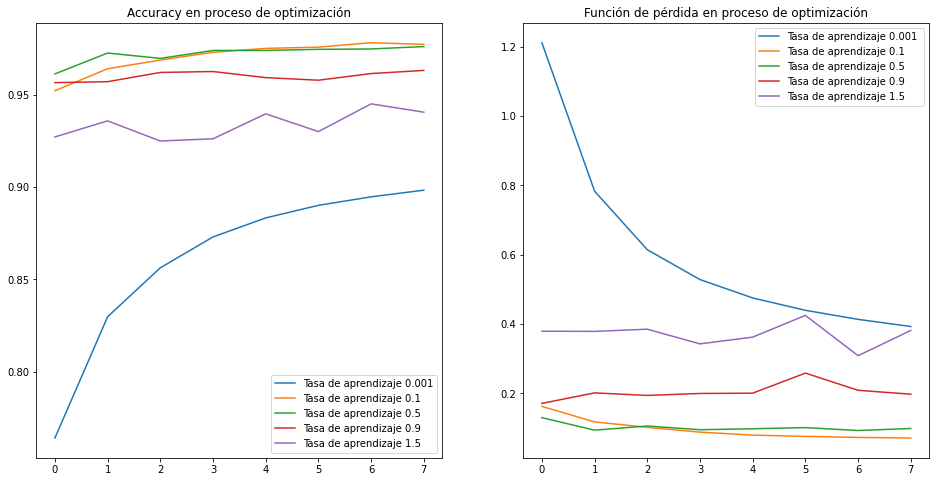

In [5]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.SGD(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyS=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyS.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyS.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 8.



###2.2.2. RMSprop

Este optimizador es similar al de descenso de gradiente con momentum. este restrige las oscilaciones en la dirección vertical. Por lo tanto, al aumentar la tasa de aprendizaje y el algoritmo podría dar pasos más grandes en la dirección horizontal convergiendo más rápido. La diferencia entre RMSprop y el descenso de gradientes radica en cómo se calculan los gradientes, pues para evitar que estos exploten, se incluye un parámetro épsilon se establece en un valor pequeño.

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2903 - accuracy: 0.9150 - val_loss: 0.1464 - val_accuracy: 0.9550
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1521 - accuracy: 0.9569 - val_loss: 0.1160 - val_accuracy: 0.9668
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1242 - accuracy: 0.9655 - val_loss: 0.1029 - val_accuracy: 0.9718
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1117 - accuracy: 0.9693 - val_loss: 0.1039 - val_accuracy: 0.9723
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1025 - accuracy: 0.9723 - val_loss: 0.1009 - val_accuracy: 0.9736
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0944 - accuracy: 0.9740 - val_loss: 0.0985 - val_accuracy: 0.9751
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0877 - accuracy: 0.9774 - val_loss: 0.0979 - val_accuracy: 0.9760

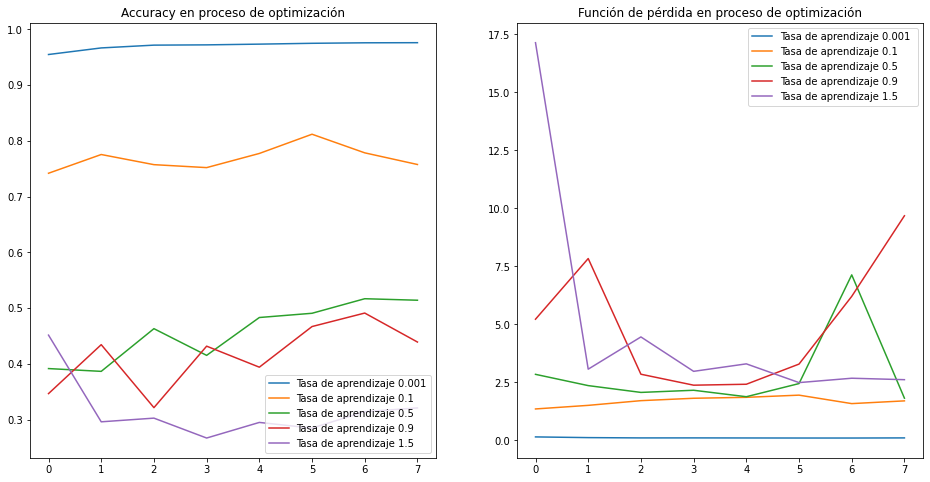

In [6]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.RMSprop(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyR=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')


De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.001, hiperparámetro con el cual termina convergiendo más rápido. El segundo mejor desempeño se obtuvo con una tasa de aprendizaje de 0.1, muy por debajo del accuracy del primer lugar.


###2.2.3.AdaGrad (Adaptative Gradient Algorithm o Algoritmo de Gradiente Adaptativo):

Este optimizador es una modificación del descenso de gradiente estocástico SGD, en este se utilizan diferentes tasas de aprendizaje para las variables teniendo en cuenta gradiente acumulado en cada una de ellas. 

Con este optimizador se puede lograr un cambio automático de tasa de aprendizaje. Si el gradiente es grande la tasa de aprendizaje decae rápidamente, lo que puede llevar a no aproximarse al mínimo, mientras que si el gradiente es pequeño la tasa de aprendizaje disminuye más lentamente.Para cada parámetro, a medida que aumenta la distancia de actualización total, su velocidad de aprendizaje también disminuye.

Este puede funcionar bien en algoritmos comunes.Pero en el aprendizaje profundo, cuando la profundidad es demasiado profunda, el entrenamiento terminará temprano.

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2812 - accuracy: 0.6642 - val_loss: 0.7414 - val_accuracy: 0.8461
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6998 - accuracy: 0.8194 - val_loss: 0.5349 - val_accuracy: 0.8764
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5682 - accuracy: 0.8478 - val_loss: 0.4588 - val_accuracy: 0.8902
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5092 - accuracy: 0.8609 - val_loss: 0.4171 - val_accuracy: 0.8968
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4712 - accuracy: 0.8699 - val_loss: 0.3902 - val_accuracy: 0.9022
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4456 - accuracy: 0.8771 - val_loss: 0.3703 - val_accuracy: 0.9068
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4270 - accuracy: 0.8805 - val_loss: 0.3553 - val_accuracy: 0.9089

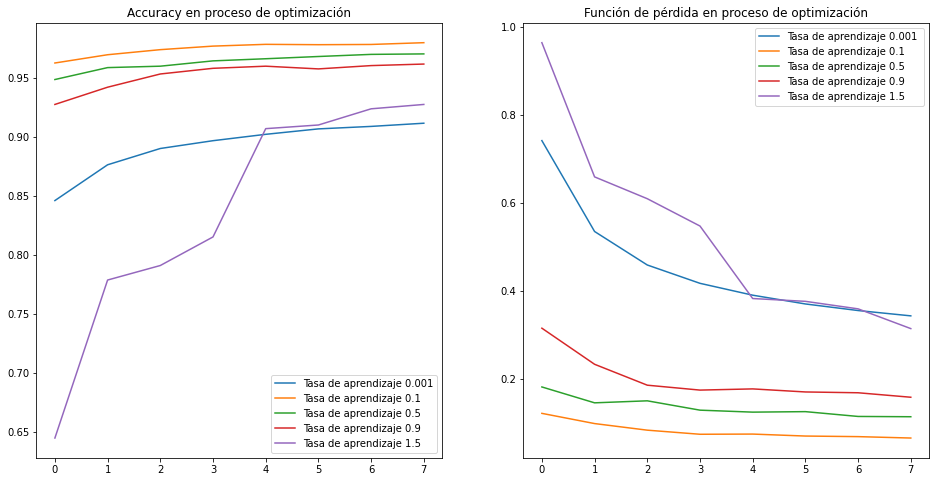

In [7]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.Adagrad(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyA=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyA.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyA.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados se observa un mejor accuracy y función de pérdida con una tasa de aprendizaje de 0.1. Mientras que los peores comportamientos respecto al accuracy de evaluación se obtuvieron con una tasa de aprendizaje 0.001 y 1.5, correspondientes al menor y mayor valor de hiperparámetros



###2.2.4.Adadelta 

Esta es una extensión de Adagrad que busca reducir su tasa de aprendizaje agresiva y decreciente. En lugar de acumular todos los gradientes cuadrados pasados, Adadelta restringe la ventana de gradientes pasados ​​acumulados a un tamaño fijo. En este optimizador no se necesita establecer una tasa de aprendizaje predeterminada, ya que se ha eliminado de la regla de actualización.

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2594 - accuracy: 0.1886 - val_loss: 2.1639 - val_accuracy: 0.2846
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1152 - accuracy: 0.2894 - val_loss: 2.0238 - val_accuracy: 0.3883
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9855 - accuracy: 0.3825 - val_loss: 1.8942 - val_accuracy: 0.5015
Epoch 4/8
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8654 - accuracy: 0.4709 - val_loss: 1.7726 - val_accuracy: 0.5899
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7535 - accuracy: 0.5444 - val_loss: 1.6582 - val_accuracy: 0.6532
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6453 - accuracy: 0.6020 - val_loss: 1.5503 - val_accuracy: 0.6987
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5464 - accuracy: 0.6436 - val_loss: 1.4495 - val_accuracy: 0.7306

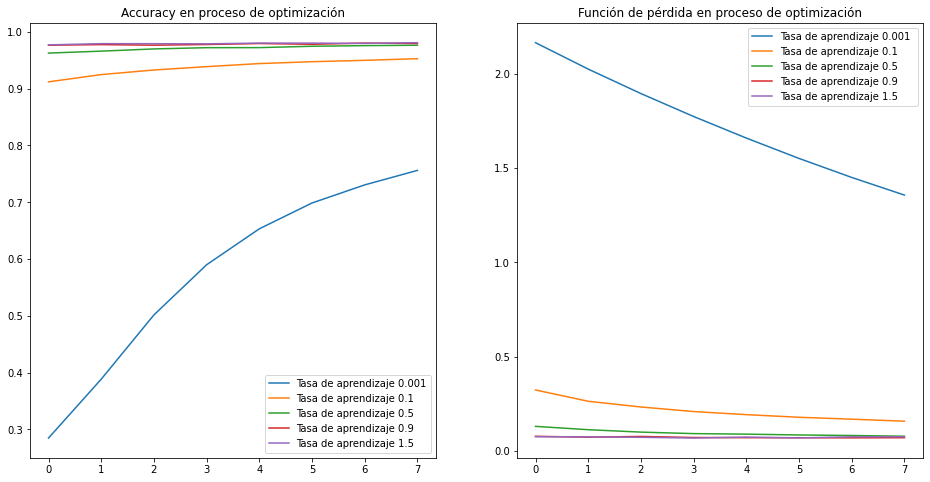

In [8]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.Adadelta(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyD=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyD.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyD.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

El mejor desempeño respecto al accuracy se obtuvo utilizando una tasa de aprendizaje de 1.5 y 0.9


###2.2.5. Comparación optimizadores (tasa de aprendizaje 0.1)

Dado que en algunos de los ejercicios anteriores se obtuvo un mejor desempeño con una tasa de aprendizaje de 0.1, a continuación se comparan los optimizadores utilizando este hiperparámetro. La validación por optimizador y por tasa de aprendizaje se presenta en el punto 2.3. de esta entrada

In [9]:
EPOCHS = 8
optimizers_list = [
    tf.keras.optimizers.SGD(learning_rate=0.1),
    tf.keras.optimizers.RMSprop(learning_rate=0.1),
    tf.keras.optimizers.Adagrad(learning_rate=0.1),
    tf.keras.optimizers.Adadelta(learning_rate=0.1)
]


In [10]:
results = {}
history = {}
for optimizer in optimizers_list:
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')])

  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  optimizer_key = str(type(optimizer).__name__)
  history[optimizer_key] = model.fit(x_train, y_train, epochs=EPOCHS,validation_data=(x_test, y_test))
  results[optimizer_key] = {}
  results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
  results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]
  results[optimizer_key]["accuracy"] = history[optimizer_key].history['accuracy'][EPOCHS - 1]
  results[optimizer_key]["val_accuracy"] = history[optimizer_key].history['val_accuracy'][EPOCHS - 1]

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3354 - accuracy: 0.9039 - val_loss: 0.1709 - val_accuracy: 0.9496
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1741 - accuracy: 0.9489 - val_loss: 0.1232 - val_accuracy: 0.9626
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1345 - accuracy: 0.9605 - val_loss: 0.0994 - val_accuracy: 0.9693
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1100 - accuracy: 0.9666 - val_loss: 0.0881 - val_accuracy: 0.9722
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0965 - accuracy: 0.9706 - val_loss: 0.0892 - val_accuracy: 0.9721
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9736 - val_loss: 0.0806 - val_accuracy: 0.9750
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0768 - accuracy: 0.9765 - val_loss: 0.0754 - val_accuracy: 0.9771

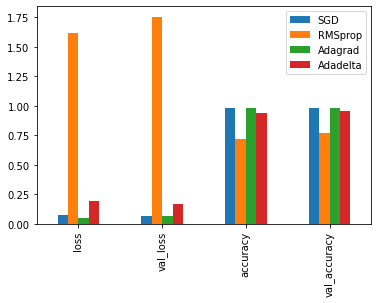

In [11]:
df_results = pd.DataFrame(results)
df_results.plot.bar()

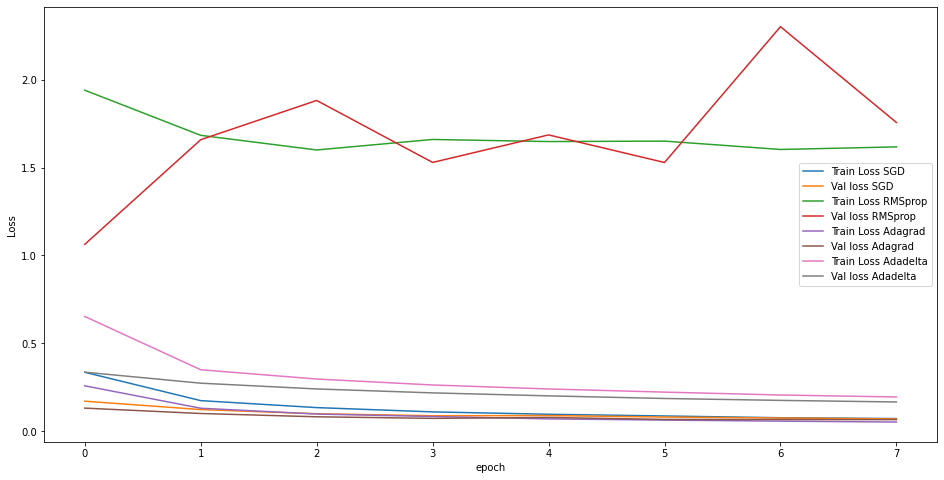

In [12]:
plt.figure(figsize=(16,8))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()


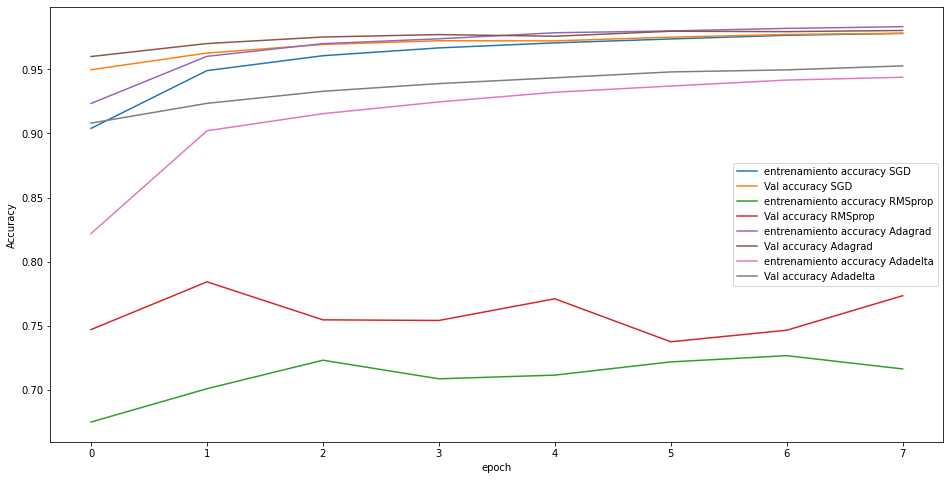

In [13]:
plt.figure(figsize=(16,8))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['accuracy']), 
           label='entrenamiento accuracy '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_accuracy']),
           label = 'Val accuracy '+optimizer)
plt.legend()


##2.3.Exploración diferentes tasas de aprendizaje

###2.3.1.Descenso de gradiente estocástico - SGD

####2.3.1.1. Tasa de aprendizaje 0.001

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7442 - accuracy: 0.5124 - val_loss: 1.1817 - val_accuracy: 0.7823
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0086 - accuracy: 0.7620 - val_loss: 0.7595 - val_accuracy: 0.8419
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7567 - accuracy: 0.8060 - val_loss: 0.5998 - val_accuracy: 0.8626
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6410 - accuracy: 0.8297 - val_loss: 0.5187 - val_accuracy: 0.8762
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5759 - accuracy: 0.8432 - val_loss: 0.4685 - val_accuracy: 0.8845
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5311 - accuracy: 0.8532 - val_loss: 0.4344 - val_accuracy: 0.8906
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4985 - accuracy: 0.8611 - val_loss: 0.4093 - val_accuracy: 0.8959

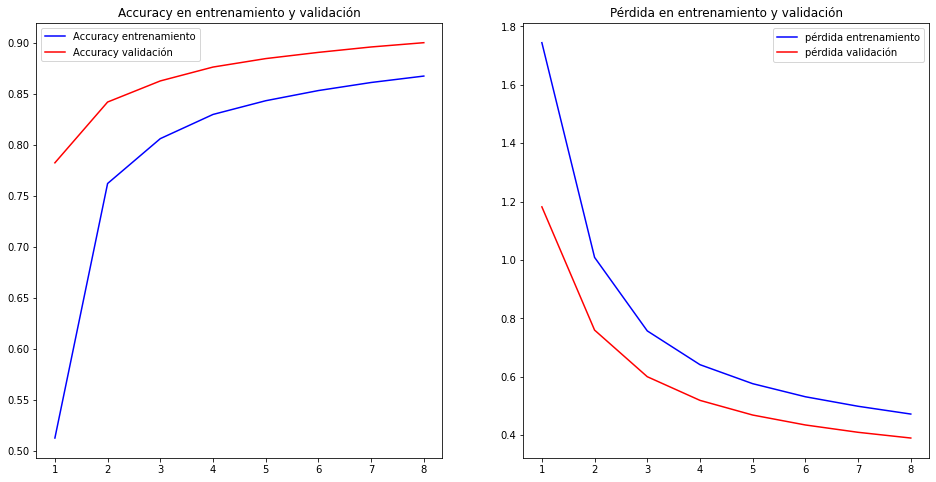

In [14]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS1=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS1.history['loss']
val_loss = historyS1.history['val_loss']
acc = historyS1.history['accuracy']
val_acc = historyS1.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [15]:
print('pérdida en entrenamiento ', historyS1.history['loss'][-1])
print('pérdida en  test         ', historyS1.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS1.history['accuracy'][-1])
print('accuracy en test         ', historyS1.history['val_accuracy'][-1])

pérdida en entrenamiento  0.47183629870414734
pérdida en  test          0.3896971046924591
accuracy en entrenamiento 0.8673666715621948
accuracy en test          0.9000999927520752


####2.3.1.2. Tasa de aprendizaje 0.1

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3320 - accuracy: 0.9033 - val_loss: 0.1687 - val_accuracy: 0.9504
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1694 - accuracy: 0.9501 - val_loss: 0.1185 - val_accuracy: 0.9645
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1315 - accuracy: 0.9625 - val_loss: 0.1032 - val_accuracy: 0.9689
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9678 - val_loss: 0.0909 - val_accuracy: 0.9725
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0964 - accuracy: 0.9712 - val_loss: 0.0823 - val_accuracy: 0.9745
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0858 - accuracy: 0.9744 - val_loss: 0.0782 - val_accuracy: 0.9759
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9760 - val_loss: 0.0746 - val_accuracy: 0.9770

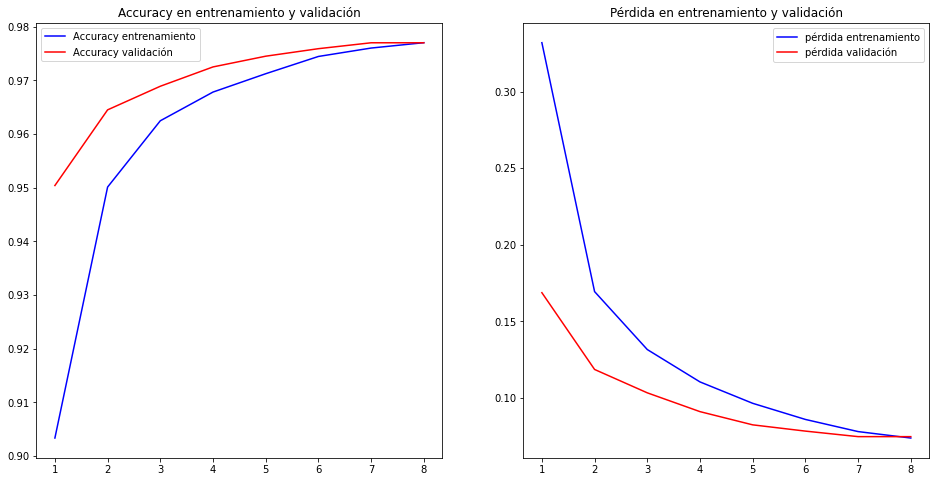

In [16]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS2=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS2.history['loss']
val_loss = historyS2.history['val_loss']
acc = historyS2.history['accuracy']
val_acc = historyS2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [17]:
print('pérdida en entrenamiento ', historyS2.history['loss'][-1])
print('pérdida en  test         ', historyS2.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS2.history['accuracy'][-1])
print('accuracy en test         ', historyS2.history['val_accuracy'][-1])

pérdida en entrenamiento  0.07365605235099792
pérdida en  test          0.07456313818693161
accuracy en entrenamiento 0.9770166873931885
accuracy en test          0.9769999980926514


####2.3.1.3. Tasa de aprendizaje 0.5

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2940 - accuracy: 0.9107 - val_loss: 0.1233 - val_accuracy: 0.9615
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1641 - accuracy: 0.9498 - val_loss: 0.1193 - val_accuracy: 0.9625
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1393 - accuracy: 0.9578 - val_loss: 0.1111 - val_accuracy: 0.9670
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1209 - accuracy: 0.9628 - val_loss: 0.1028 - val_accuracy: 0.9694
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1134 - accuracy: 0.9654 - val_loss: 0.1047 - val_accuracy: 0.9710
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1040 - accuracy: 0.9674 - val_loss: 0.1017 - val_accuracy: 0.9733
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0987 - accuracy: 0.9695 - val_loss: 0.1045 - val_accuracy: 0.9731

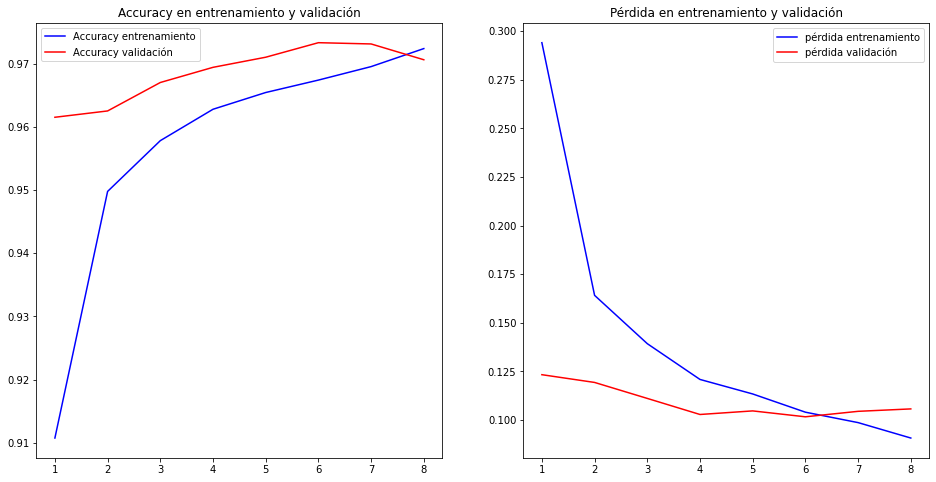

In [18]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS3=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS3.history['loss']
val_loss = historyS3.history['val_loss']
acc = historyS3.history['accuracy']
val_acc = historyS3.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [19]:
print('pérdida en entrenamiento ', historyS3.history['loss'][-1])
print('pérdida en  test         ', historyS3.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS3.history['accuracy'][-1])
print('accuracy en test         ', historyS3.history['val_accuracy'][-1])

pérdida en entrenamiento  0.09073254466056824
pérdida en  test          0.1057083010673523
accuracy en entrenamiento 0.9723666906356812
accuracy en test          0.9706000089645386


####2.3.1.4. Tasa de aprendizaje 0.9

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4935 - accuracy: 0.8533 - val_loss: 0.2227 - val_accuracy: 0.9352
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.9119 - val_loss: 0.1865 - val_accuracy: 0.9493
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2787 - accuracy: 0.9251 - val_loss: 0.2103 - val_accuracy: 0.9468
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.9303 - val_loss: 0.1632 - val_accuracy: 0.9579
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2344 - accuracy: 0.9372 - val_loss: 0.1682 - val_accuracy: 0.9552
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2272 - accuracy: 0.9399 - val_loss: 0.1787 - val_accuracy: 0.9578
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2242 - accuracy: 0.9416 - val_loss: 0.1778 - val_accuracy: 0.9559

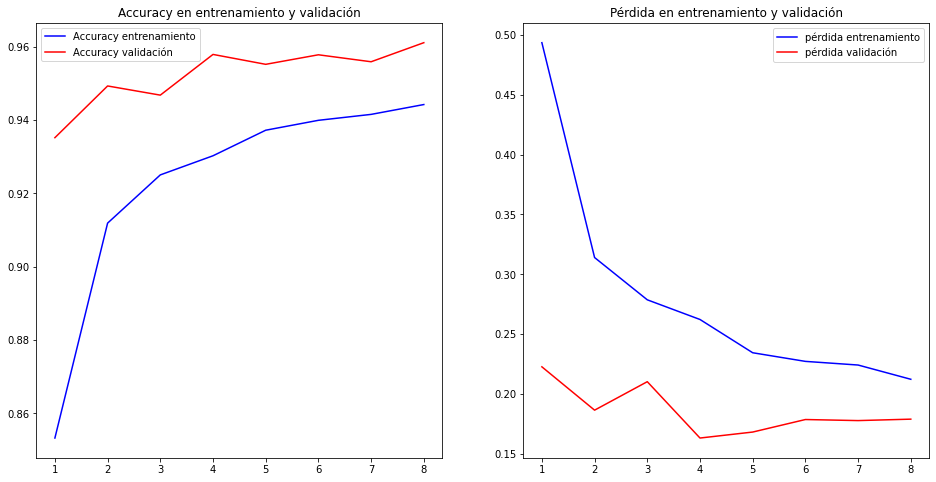

In [20]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS4=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS4.history['loss']
val_loss = historyS4.history['val_loss']
acc = historyS4.history['accuracy']
val_acc = historyS4.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [21]:
print('pérdida en entrenamiento ', historyS4.history['loss'][-1])
print('pérdida en  test         ', historyS4.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS4.history['accuracy'][-1])
print('accuracy en test         ', historyS4.history['val_accuracy'][-1])

pérdida en entrenamiento  0.21228262782096863
pérdida en  test          0.17897401750087738
accuracy en entrenamiento 0.9442333579063416
accuracy en test          0.9610999822616577


####2.3.1.5. Tasa de aprendizaje 1.5

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0690 - accuracy: 0.2051 - val_loss: 1.9856 - val_accuracy: 0.2120
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9480 - accuracy: 0.2457 - val_loss: 1.7772 - val_accuracy: 0.2943
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9509 - accuracy: 0.2464 - val_loss: 1.8890 - val_accuracy: 0.2712
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0382 - accuracy: 0.2160 - val_loss: 2.0003 - val_accuracy: 0.2110
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0334 - accuracy: 0.2200 - val_loss: 1.8672 - val_accuracy: 0.2685
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0072 - accuracy: 0.2307 - val_loss: 2.0029 - val_accuracy: 0.2191
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0000 - accuracy: 0.2262 - val_loss: 1.8506 - val_accuracy: 0.2857

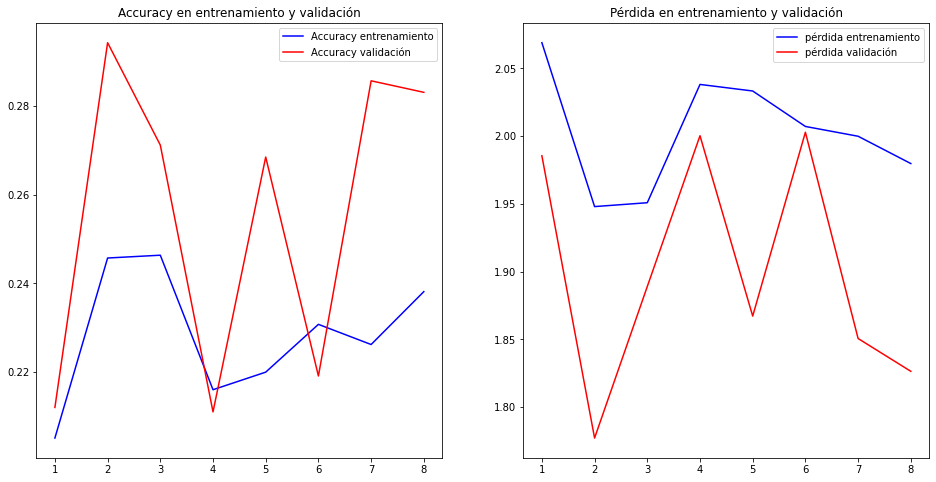

In [22]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS5=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS5.history['loss']
val_loss = historyS5.history['val_loss']
acc = historyS5.history['accuracy']
val_acc = historyS5.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [23]:
print('pérdida en entrenamiento ', historyS5.history['loss'][-1])
print('pérdida en validación    ', historyS5.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS5.history['accuracy'][-1])
print('accuracy en validación   ', historyS5.history['val_accuracy'][-1])

pérdida en entrenamiento  1.9798147678375244
pérdida en validación     1.8264168500900269
accuracy en entrenamiento 0.23813332617282867
accuracy en validación    0.2831000089645386


Al tomar en cuenta los resultados del accuracy obtenido en los datos de entrenamiento y los de validación para las diferentes tasas de aprendizaje planteadas se puede concluir que el mejor rendimiento se obtuvo con una tasa de aprendizaje de 0.1 dado que el accuracy en los dos conjuntos de datos es muy similar, seguido de una tasa de aprendizaje con 0.5. El peor resultado se obtuvo con una tasa de aprendizaje de 1.5. En general con todas las tasas de aprendizaje la métrica de accuracy y la función de pérdida es muy similar en los datos de entrenamiento y los de validación

###2.3.2. RMSprop


####2.3.2.1. Tasa de aprendizaje 0.001

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2956 - accuracy: 0.9144 - val_loss: 0.1532 - val_accuracy: 0.9535
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1530 - accuracy: 0.9554 - val_loss: 0.1174 - val_accuracy: 0.9672
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9653 - val_loss: 0.1084 - val_accuracy: 0.9710
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1086 - accuracy: 0.9688 - val_loss: 0.0981 - val_accuracy: 0.9727
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1014 - accuracy: 0.9725 - val_loss: 0.0935 - val_accuracy: 0.9743
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0942 - accuracy: 0.9749 - val_loss: 0.0951 - val_accuracy: 0.9742
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0898 - accuracy: 0.9761 - val_loss: 0.0938 - val_accuracy: 0.9766

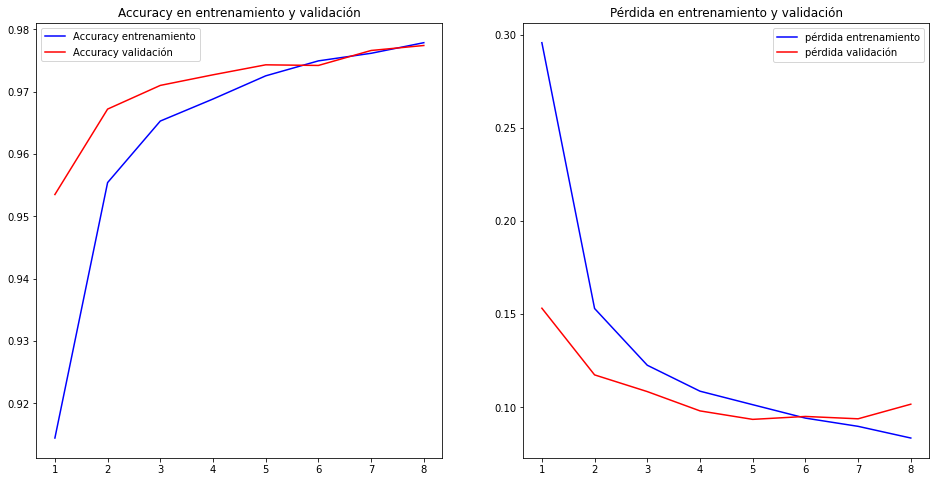

In [24]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR1=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR1.history['loss']
val_loss = historyR1.history['val_loss']
acc = historyR1.history['accuracy']
val_acc = historyR1.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [25]:
print('pérdida en entrenamiento ', historyR1.history['loss'][-1])
print('pérdida en validación    ', historyR1.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR1.history['accuracy'][-1])
print('accuracy en validación   ', historyR1.history['val_accuracy'][-1])

pérdida en entrenamiento  0.08349669724702835
pérdida en validación     0.10165102779865265
accuracy en entrenamiento 0.9778500199317932
accuracy en validación    0.977400004863739


####2.3.2.2. Tasa de aprendizaje 0.1

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 1.9433 - accuracy: 0.6360 - val_loss: 1.3674 - val_accuracy: 0.6847
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6416 - accuracy: 0.6636 - val_loss: 1.3146 - val_accuracy: 0.7326
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6268 - accuracy: 0.6649 - val_loss: 2.1895 - val_accuracy: 0.7379
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5879 - accuracy: 0.6788 - val_loss: 1.3693 - val_accuracy: 0.7397
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6167 - accuracy: 0.6842 - val_loss: 1.6016 - val_accuracy: 0.7206
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6243 - accuracy: 0.6769 - val_loss: 1.5671 - val_accuracy: 0.7131
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5007 - accuracy: 0.6707 - val_loss: 1.8013 - val_accuracy: 0.7410

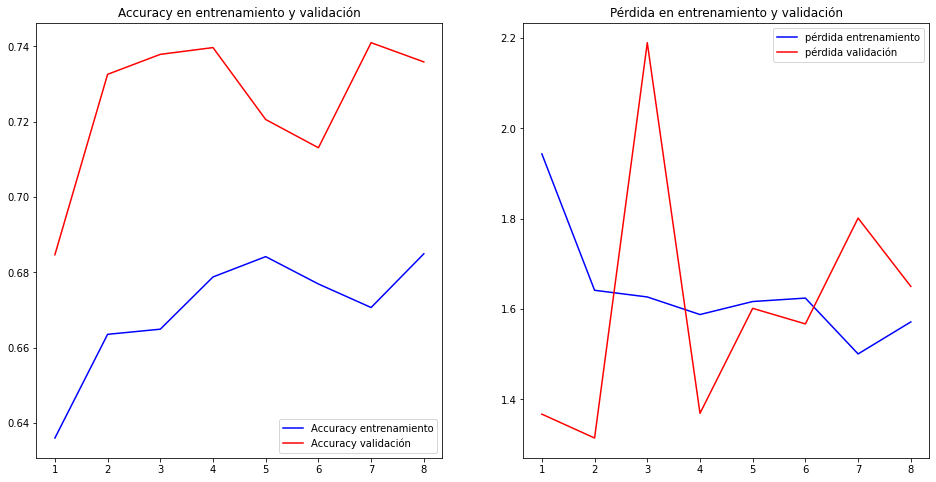

In [26]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR2=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR2.history['loss']
val_loss = historyR2.history['val_loss']
acc = historyR2.history['accuracy']
val_acc = historyR2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [27]:
print('pérdida en entrenamiento ', historyR2.history['loss'][-1])
print('pérdida en validación    ', historyR2.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR2.history['accuracy'][-1])
print('accuracy en validación   ', historyR2.history['val_accuracy'][-1])

pérdida en entrenamiento  1.5715333223342896
pérdida en validación     1.6501458883285522
accuracy en entrenamiento 0.6849499940872192
accuracy en validación    0.7358999848365784


####2.3.2.3. Tasa de aprendizaje 0.5

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 9.4775 - accuracy: 0.1636 - val_loss: 2.6088 - val_accuracy: 0.2040
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5862 - accuracy: 0.2012 - val_loss: 2.8081 - val_accuracy: 0.1632
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 2.6591 - accuracy: 0.2165 - val_loss: 3.1886 - val_accuracy: 0.2933
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6287 - accuracy: 0.2292 - val_loss: 2.8408 - val_accuracy: 0.2466
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5181 - accuracy: 0.2229 - val_loss: 2.1223 - val_accuracy: 0.2365
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4997 - accuracy: 0.2512 - val_loss: 2.3585 - val_accuracy: 0.2338
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6534 - accuracy: 0.2511 - val_loss: 2.8142 - val_accuracy: 0.2734

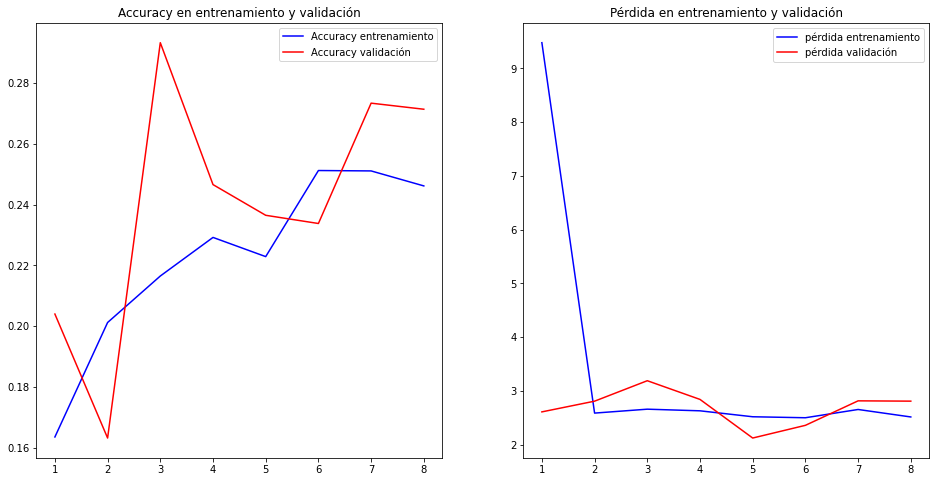

In [28]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR3=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR3.history['loss']
val_loss = historyR3.history['val_loss']
acc = historyR3.history['accuracy']
val_acc = historyR3.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [29]:
print('pérdida en entrenamiento ', historyR3.history['loss'][-1])
print('pérdida en validación    ', historyR3.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR3.history['accuracy'][-1])
print('accuracy en validación   ', historyR3.history['val_accuracy'][-1])

pérdida en entrenamiento  2.514381170272827
pérdida en validación     2.8085238933563232
accuracy en entrenamiento 0.2461666613817215
accuracy en validación    0.27140000462532043


####2.3.2.4. Tasa de aprendizaje 0.9

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 23.8062 - accuracy: 0.1331 - val_loss: 2.5689 - val_accuracy: 0.1067
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5306 - accuracy: 0.1244 - val_loss: 2.6089 - val_accuracy: 0.1448
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6860 - accuracy: 0.1271 - val_loss: 2.7101 - val_accuracy: 0.1542
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5772 - accuracy: 0.1242 - val_loss: 2.4671 - val_accuracy: 0.1043
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.6375 - accuracy: 0.1246 - val_loss: 2.3238 - val_accuracy: 0.1405
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4837 - accuracy: 0.1312 - val_loss: 2.4298 - val_accuracy: 0.1028
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4418 - accuracy: 0.1357 - val_loss: 2.4849 - val_accuracy: 0.142

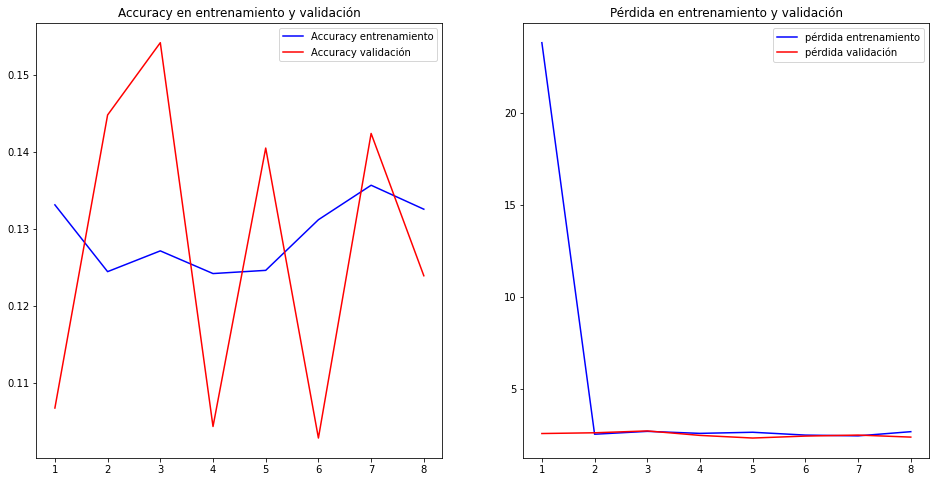

In [30]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR4=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR4.history['loss']
val_loss = historyR4.history['val_loss']
acc = historyR4.history['accuracy']
val_acc = historyR4.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [31]:
print('pérdida en entrenamiento ', historyR4.history['loss'][-1])
print('pérdida en validación    ', historyR4.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR4.history['accuracy'][-1])
print('accuracy en validación   ', historyR4.history['val_accuracy'][-1])

pérdida en entrenamiento  2.6687958240509033
pérdida en validación     2.3742165565490723
accuracy en entrenamiento 0.13255000114440918
accuracy en validación    0.12389999628067017


####2.3.2.5. Tasa de aprendizaje 1.5

Epoch 1/8
1875/1875 [==============================] - 7s 3ms/step - loss: 72.3592 - accuracy: 0.1558 - val_loss: 2.9022 - val_accuracy: 0.1436
Epoch 2/8
1875/1875 [==============================] - 6s 3ms/step - loss: 3.4830 - accuracy: 0.1257 - val_loss: 2.5291 - val_accuracy: 0.1068
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 3.0566 - accuracy: 0.1375 - val_loss: 2.7935 - val_accuracy: 0.1688
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9435 - accuracy: 0.1388 - val_loss: 2.4431 - val_accuracy: 0.1326
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 2.9027 - accuracy: 0.1351 - val_loss: 2.8519 - val_accuracy: 0.1599
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8477 - accuracy: 0.1407 - val_loss: 2.6607 - val_accuracy: 0.1453
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.9446 - accuracy: 0.1443 - val_loss: 2.6786 - val_accuracy: 0.145

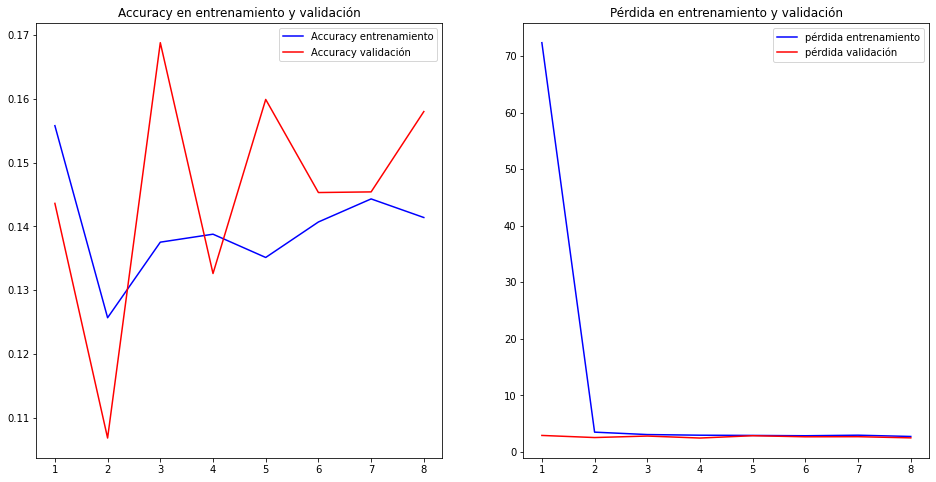

In [32]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyR5=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR5.history['loss']
val_loss = historyR5.history['val_loss']
acc = historyR5.history['accuracy']
val_acc = historyR5.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [33]:
print('pérdida en entrenamiento ', historyR5.history['loss'][-1])
print('pérdida en validación    ', historyR5.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR5.history['accuracy'][-1])
print('accuracy en validación   ', historyR5.history['val_accuracy'][-1])

pérdida en entrenamiento  2.7190191745758057
pérdida en validación     2.473857879638672
accuracy en entrenamiento 0.1413833349943161
accuracy en validación    0.15800000727176666


Al tomar en cuenta los resultados del accuracy obtenido en los datos de entrenamiento y los de validación para las diferentes tasas de aprendizaje planteadas se puede concluir que el mejor rendimiento se obtuvo con una tasa de aprendizaje de 0.1 dado que el accuracy en los dos conjuntos de datos es muy similar, seguido de una tasa de aprendizaje con 0.5. El peor resultado se obtuvo con una tasa de aprendizaje de 1.5. En general con todas las tasas de aprendizaje la métrica de accuracy y la función de pérdida es muy similar en los datos de entrenamiento y los de validación

###2.3.3.AdaGrad (Adaptative Gradient Algorithm o Algoritmo de Gradiente Adaptativo):

A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.3.3.1. Tasa de aprendizaje 0.001

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3131 - accuracy: 0.6528 - val_loss: 0.7568 - val_accuracy: 0.8423
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7126 - accuracy: 0.8184 - val_loss: 0.5451 - val_accuracy: 0.8745
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5786 - accuracy: 0.8472 - val_loss: 0.4659 - val_accuracy: 0.8873
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5172 - accuracy: 0.8597 - val_loss: 0.4232 - val_accuracy: 0.8950
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4802 - accuracy: 0.8674 - val_loss: 0.3959 - val_accuracy: 0.8987
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4537 - accuracy: 0.8744 - val_loss: 0.3763 - val_accuracy: 0.9025
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4348 - accuracy: 0.8791 - val_loss: 0.3614 - val_accuracy: 0.9050

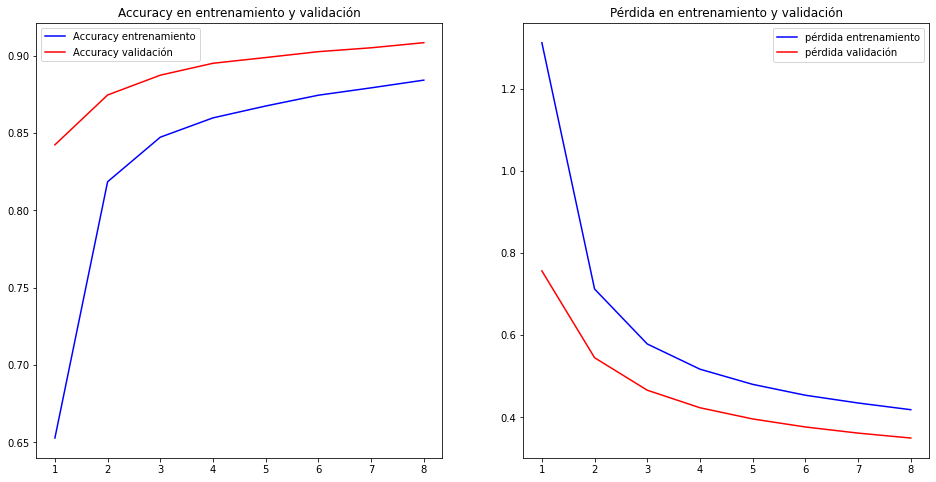

In [34]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA1=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA1.history['loss']
val_loss = historyA1.history['val_loss']
acc = historyA1.history['accuracy']
val_acc = historyA1.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [35]:
print('pérdida en entrenamiento ', historyA1.history['loss'][-1])
print('pérdida en  test         ', historyA1.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA1.history['accuracy'][-1])
print('accuracy en test         ', historyA1.history['val_accuracy'][-1])

pérdida en entrenamiento  0.4184282124042511
pérdida en  test          0.3493574261665344
accuracy en entrenamiento 0.8841000199317932
accuracy en test          0.90829998254776


####2.3.3.2. Tasa de aprendizaje 0.1

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2571 - accuracy: 0.9210 - val_loss: 0.1193 - val_accuracy: 0.9635
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1307 - accuracy: 0.9610 - val_loss: 0.0962 - val_accuracy: 0.9703
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1003 - accuracy: 0.9698 - val_loss: 0.0835 - val_accuracy: 0.9743
Epoch 4/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0871 - accuracy: 0.9730 - val_loss: 0.0822 - val_accuracy: 0.9742
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0748 - accuracy: 0.9764 - val_loss: 0.0741 - val_accuracy: 0.9765
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9797 - val_loss: 0.0689 - val_accuracy: 0.9786
Epoch 7/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0596 - accuracy: 0.9812 - val_loss: 0.0729 - val_accuracy: 0.9777

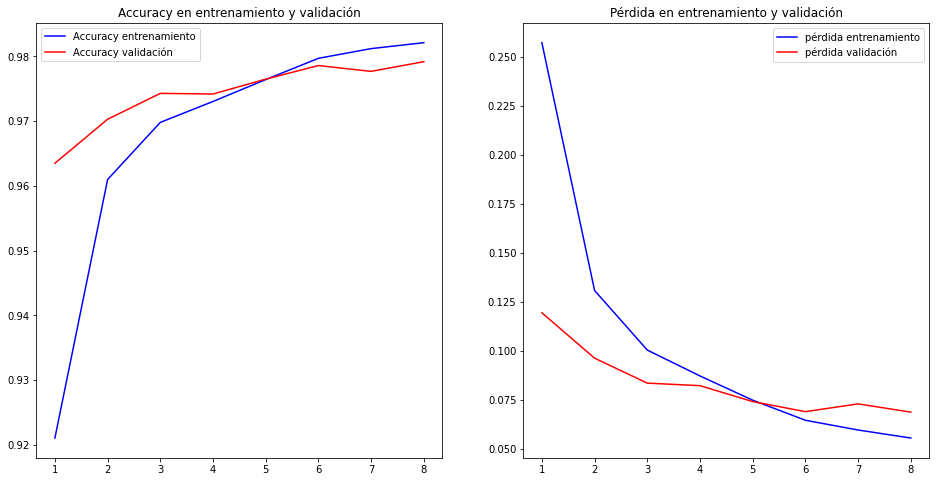

In [36]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA2=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA2.history['loss']
val_loss = historyA2.history['val_loss']
acc = historyA2.history['accuracy']
val_acc = historyA2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [37]:
print('pérdida en entrenamiento ', historyA2.history['loss'][-1])
print('pérdida en  test         ', historyA2.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA2.history['accuracy'][-1])
print('accuracy en test         ', historyA2.history['val_accuracy'][-1])

pérdida en entrenamiento  0.0554681122303009
pérdida en  test          0.0686822459101677
accuracy en entrenamiento 0.9821333289146423
accuracy en test          0.979200005531311


####2.3.3.3. Tasa de aprendizaje 0.5

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8434 - accuracy: 0.7181 - val_loss: 0.2947 - val_accuracy: 0.9153
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4604 - accuracy: 0.8602 - val_loss: 0.2489 - val_accuracy: 0.9294
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3954 - accuracy: 0.8802 - val_loss: 0.2288 - val_accuracy: 0.9349
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3447 - accuracy: 0.8959 - val_loss: 0.2051 - val_accuracy: 0.9448
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3143 - accuracy: 0.9054 - val_loss: 0.1922 - val_accuracy: 0.9472
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2953 - accuracy: 0.9118 - val_loss: 0.1987 - val_accuracy: 0.9459
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2803 - accuracy: 0.9158 - val_loss: 0.1832 - val_accuracy: 0.9499

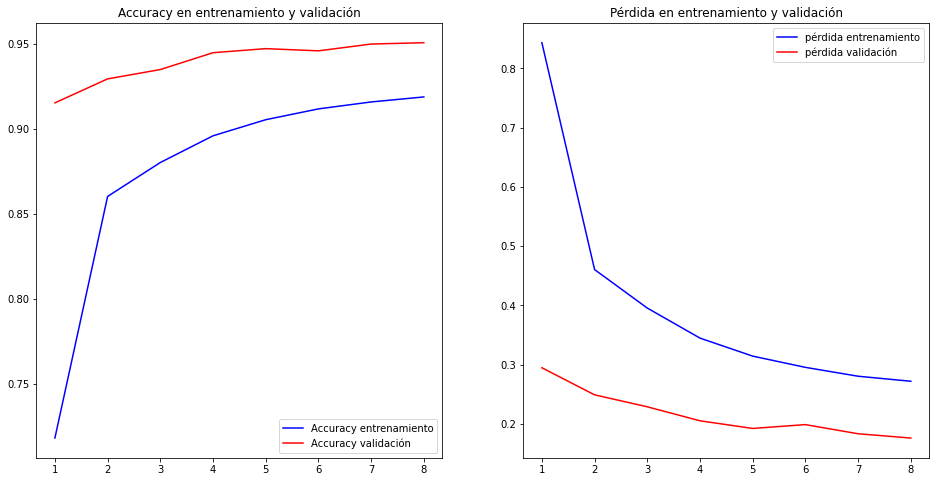

In [38]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA3=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA3.history['loss']
val_loss = historyA3.history['val_loss']
acc = historyA3.history['accuracy']
val_acc = historyA3.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [39]:
print('pérdida en entrenamiento ', historyA3.history['loss'][-1])
print('pérdida en  test         ', historyA3.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA3.history['accuracy'][-1])
print('accuracy en test         ', historyA3.history['val_accuracy'][-1])

pérdida en entrenamiento  0.27187955379486084
pérdida en  test          0.17602308094501495
accuracy en entrenamiento 0.9187833070755005
accuracy en test          0.9506999850273132


####2.3.3.4. Tasa de aprendizaje 0.9

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3506 - accuracy: 0.1072 - val_loss: 2.3066 - val_accuracy: 0.1010
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3035 - accuracy: 0.1063 - val_loss: 2.3021 - val_accuracy: 0.1135
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.1086 - val_loss: 2.3043 - val_accuracy: 0.1010
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1084 - val_loss: 2.3024 - val_accuracy: 0.1135
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1085 - val_loss: 2.3014 - val_accuracy: 0.1135
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3023 - accuracy: 0.1090 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3024 - accuracy: 0.1097 - val_loss: 2.3019 - val_accuracy: 0.1028

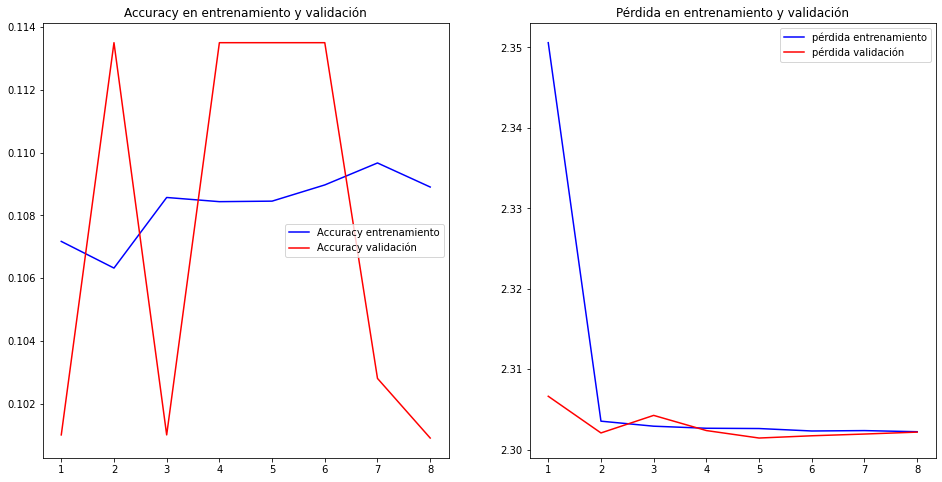

In [40]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA4=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA4.history['loss']
val_loss = historyA4.history['val_loss']
acc = historyA4.history['accuracy']
val_acc = historyA4.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [41]:
print('pérdida en entrenamiento ', historyA4.history['loss'][-1])
print('pérdida en  test         ', historyA4.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA4.history['accuracy'][-1])
print('accuracy en test         ', historyA4.history['val_accuracy'][-1])

pérdida en entrenamiento  2.302224636077881
pérdida en  test          2.3021750450134277
accuracy en entrenamiento 0.10890000313520432
accuracy en test          0.10090000182390213


####2.3.3.5. Tasa de aprendizaje 1.5

Epoch 1/8
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3998 - accuracy: 0.1111 - val_loss: 2.3064 - val_accuracy: 0.1135
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3051 - accuracy: 0.1056 - val_loss: 2.3041 - val_accuracy: 0.1032
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3042 - accuracy: 0.1060 - val_loss: 2.3038 - val_accuracy: 0.1028
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3036 - accuracy: 0.1070 - val_loss: 2.3031 - val_accuracy: 0.1135
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3033 - accuracy: 0.1063 - val_loss: 2.3022 - val_accuracy: 0.1135
Epoch 6/8
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3031 - accuracy: 0.1075 - val_loss: 2.3056 - val_accuracy: 0.1032
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.1092 - val_loss: 2.3046 - val_accuracy: 0.1135

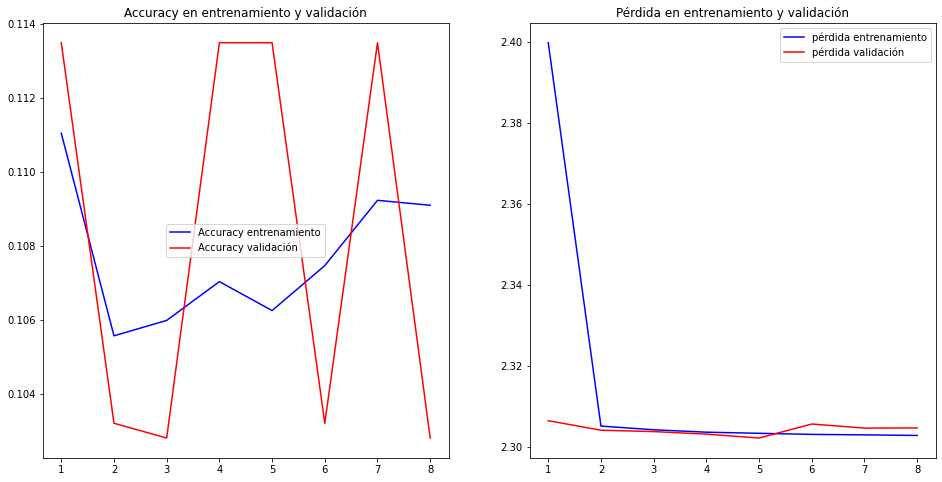

In [42]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA5=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA5.history['loss']
val_loss = historyA5.history['val_loss']
acc = historyA5.history['accuracy']
val_acc = historyA5.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [43]:
print('pérdida en entrenamiento ', historyA5.history['loss'][-1])
print('pérdida en  test         ', historyA5.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA5.history['accuracy'][-1])
print('accuracy en test         ', historyA5.history['val_accuracy'][-1])

pérdida en entrenamiento  2.3028030395507812
pérdida en  test          2.3046562671661377
accuracy en entrenamiento 0.10909999907016754
accuracy en test          0.10279999673366547


Al tomar en cuenta los resultados del accuracy obtenida en los datos de entrenamiento y los de validación para las diferentes tasas de aprendizaje planteadas se puede concluir que el mejor rendimiento se obtuvo con una tasa de aprendizaje de 0.1 dado que el accuracy en los dos conjuntos de datos es muy similar. El peor resultado se obtuvo con una tasa de aprendizaje de 1.5. En general con todas las tasas de aprendizaje la métrica de accuracy y la función de pérdida es muy similar en los datos de entrenamiento y los de validación

###2.3.4.Adadelta 

A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.3.4.1. Tasa de aprendizaje 0.001

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2815 - accuracy: 0.1567 - val_loss: 2.1725 - val_accuracy: 0.2462
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1273 - accuracy: 0.2566 - val_loss: 2.0254 - val_accuracy: 0.3813
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9900 - accuracy: 0.3703 - val_loss: 1.8908 - val_accuracy: 0.5113
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8635 - accuracy: 0.4690 - val_loss: 1.7651 - val_accuracy: 0.5954
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7466 - accuracy: 0.5406 - val_loss: 1.6472 - val_accuracy: 0.6422
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6348 - accuracy: 0.5927 - val_loss: 1.5366 - val_accuracy: 0.6835
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5326 - accuracy: 0.6320 - val_loss: 1.4331 - val_accuracy: 0.7108

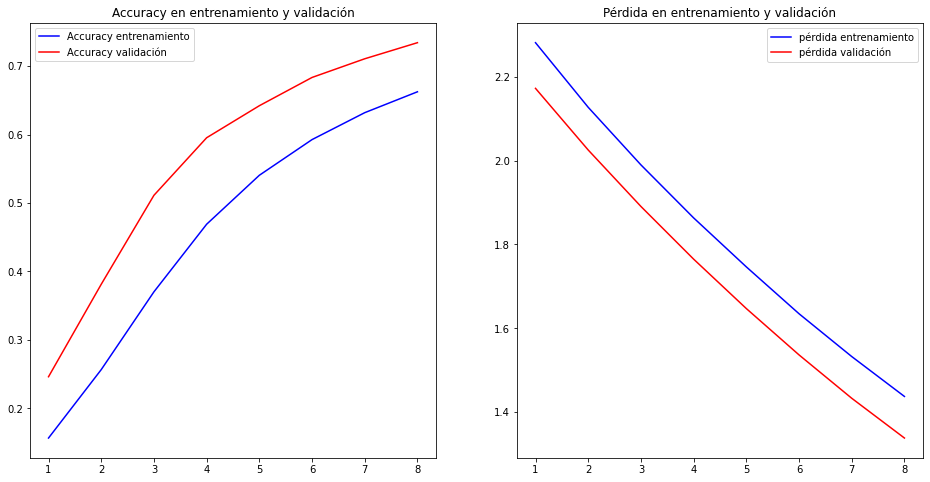

In [44]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD1=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD1.history['loss']
val_loss = historyD1.history['val_loss']
acc = historyD1.history['accuracy']
val_acc = historyD1.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [45]:
print('pérdida en entrenamiento ', historyD1.history['loss'][-1])
print('pérdida en validación    ', historyD1.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD1.history['accuracy'][-1])
print('accuracy en validación   ', historyD1.history['val_accuracy'][-1])

pérdida en entrenamiento  1.4374172687530518
pérdida en validación     1.3381942510604858
accuracy en entrenamiento 0.6625666618347168
accuracy en validación    0.7343000173568726


####2.3.4.2. Tasa de aprendizaje 0.1

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6633 - accuracy: 0.8194 - val_loss: 0.3344 - val_accuracy: 0.9111
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.9004 - val_loss: 0.2694 - val_accuracy: 0.9250
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9165 - val_loss: 0.2367 - val_accuracy: 0.9331
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2577 - accuracy: 0.9268 - val_loss: 0.2137 - val_accuracy: 0.9382
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2352 - accuracy: 0.9326 - val_loss: 0.1953 - val_accuracy: 0.9442
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2175 - accuracy: 0.9381 - val_loss: 0.1833 - val_accuracy: 0.9463
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2016 - accuracy: 0.9417 - val_loss: 0.1714 - val_accuracy: 0.9490

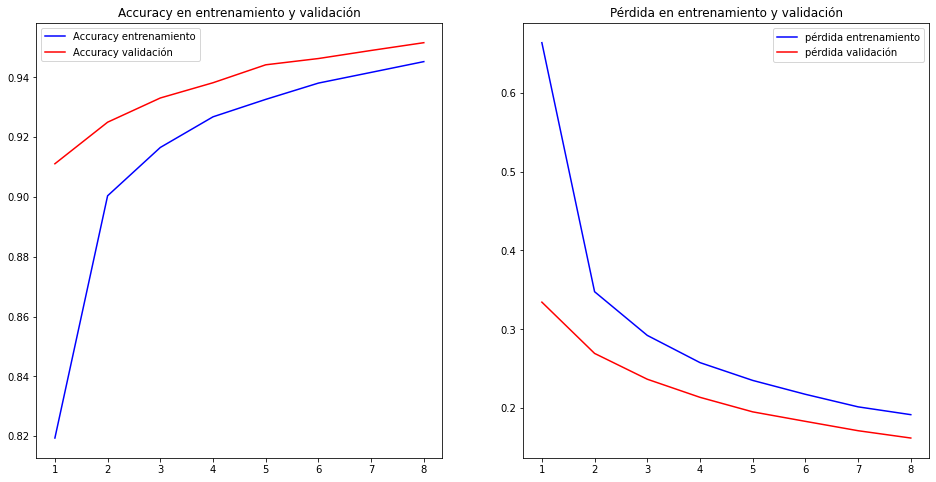

In [46]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD2=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD2.history['loss']
val_loss = historyD2.history['val_loss']
acc = historyD2.history['accuracy']
val_acc = historyD2.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [47]:
print('pérdida en entrenamiento ', historyD2.history['loss'][-1])
print('pérdida en validación    ', historyD2.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD2.history['accuracy'][-1])
print('accuracy en validación   ', historyD2.history['val_accuracy'][-1])

pérdida en entrenamiento  0.19173745810985565
pérdida en validación     0.16211022436618805
accuracy en entrenamiento 0.9452666640281677
accuracy en validación    0.9516000151634216


####2.3.4.3. Tasa de aprendizaje 0.5

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3790 - accuracy: 0.8925 - val_loss: 0.2015 - val_accuracy: 0.9434
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2068 - accuracy: 0.9404 - val_loss: 0.1521 - val_accuracy: 0.9545
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1629 - accuracy: 0.9529 - val_loss: 0.1225 - val_accuracy: 0.9641
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1363 - accuracy: 0.9604 - val_loss: 0.1064 - val_accuracy: 0.9687
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1218 - accuracy: 0.9646 - val_loss: 0.1011 - val_accuracy: 0.9701
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1090 - accuracy: 0.9683 - val_loss: 0.0948 - val_accuracy: 0.9723
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1000 - accuracy: 0.9710 - val_loss: 0.0906 - val_accuracy: 0.9726

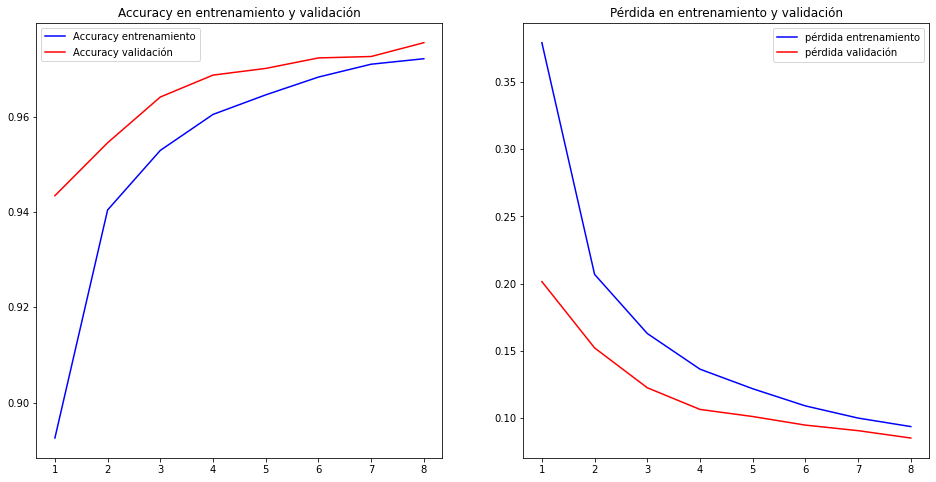

In [48]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD3=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD3.history['loss']
val_loss = historyD3.history['val_loss']
acc = historyD3.history['accuracy']
val_acc = historyD3.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [49]:
print('pérdida en entrenamiento ', historyD3.history['loss'][-1])
print('pérdida en validación    ', historyD3.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD3.history['accuracy'][-1])
print('accuracy en validación   ', historyD3.history['val_accuracy'][-1])

pérdida en entrenamiento  0.0936698243021965
pérdida en validación     0.08515678346157074
accuracy en entrenamiento 0.9721333384513855
accuracy en validación    0.9754999876022339


####2.3.4.4. Tasa de aprendizaje 0.9

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3153 - accuracy: 0.9099 - val_loss: 0.1611 - val_accuracy: 0.9544
Epoch 2/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1655 - accuracy: 0.9523 - val_loss: 0.1168 - val_accuracy: 0.9656
Epoch 3/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1292 - accuracy: 0.9625 - val_loss: 0.1013 - val_accuracy: 0.9700
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1087 - accuracy: 0.9686 - val_loss: 0.0927 - val_accuracy: 0.9717
Epoch 5/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0951 - accuracy: 0.9718 - val_loss: 0.0822 - val_accuracy: 0.9757
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0883 - accuracy: 0.9738 - val_loss: 0.0809 - val_accuracy: 0.9751
Epoch 7/8
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0798 - accuracy: 0.9761 - val_loss: 0.0792 - val_accuracy: 0.9769

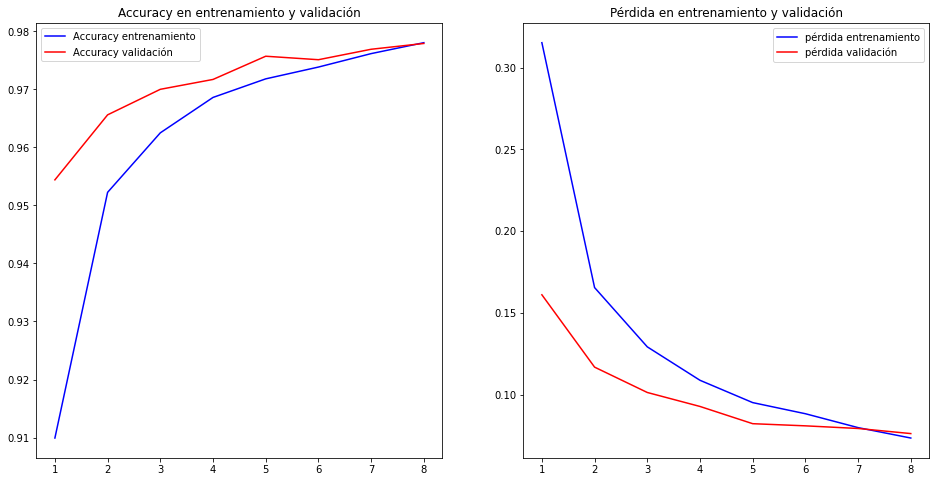

In [50]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD4=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD4.history['loss']
val_loss = historyD4.history['val_loss']
acc = historyD4.history['accuracy']
val_acc = historyD4.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [51]:
print('pérdida en entrenamiento ', historyD4.history['loss'][-1])
print('pérdida en validación    ', historyD4.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD4.history['accuracy'][-1])
print('accuracy en validación   ', historyD4.history['val_accuracy'][-1])

pérdida en entrenamiento  0.07339909672737122
pérdida en validación     0.07612449675798416
accuracy en entrenamiento 0.9780333042144775
accuracy en validación    0.9779000282287598


####2.3.4.5. Tasa de aprendizaje 1.5

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2749 - accuracy: 0.9192 - val_loss: 0.1341 - val_accuracy: 0.9607
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1404 - accuracy: 0.9595 - val_loss: 0.1072 - val_accuracy: 0.9670
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1112 - accuracy: 0.9667 - val_loss: 0.0880 - val_accuracy: 0.9728
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9714 - val_loss: 0.0823 - val_accuracy: 0.9751
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0848 - accuracy: 0.9748 - val_loss: 0.0766 - val_accuracy: 0.9765
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9765 - val_loss: 0.0724 - val_accuracy: 0.9780
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9790 - val_loss: 0.0753 - val_accuracy: 0.9787

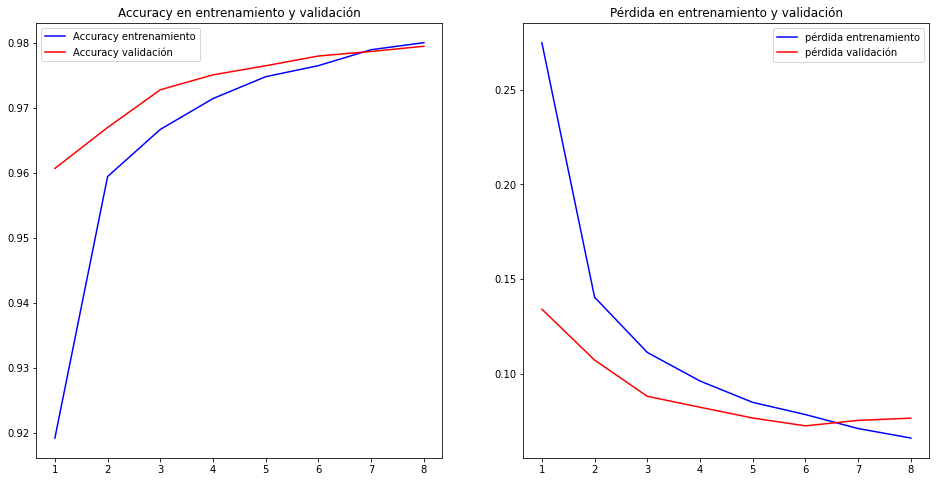

In [52]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD5=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD5.history['loss']
val_loss = historyD5.history['val_loss']
acc = historyD5.history['accuracy']
val_acc = historyD5.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [53]:
print('pérdida en entrenamiento ', historyD5.history['loss'][-1])
print('pérdida en validación    ', historyD5.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD5.history['accuracy'][-1])
print('accuracy en validación   ', historyD5.history['val_accuracy'][-1])

pérdida en entrenamiento  0.0659945085644722
pérdida en validación     0.07650595903396606
accuracy en entrenamiento 0.9800500273704529
accuracy en validación    0.9794999957084656


Al tomar en cuenta los resultados del accuracy obtenido en los datos de entrenamiento y los de validación para las diferentes tasas de aprendizaje planteadas se puede concluir que el mejor rendimiento se obtuvo con una tasa de aprendizaje de 0.1 dado que el accuracy en los dos conjuntos de datos es muy similar, seguido de una tasa de aprendizaje con 0.5. El peor resultado se obtuvo con una tasa de aprendizaje de 1.5. En general con todas las tasas de aprendizaje la métrica de accuracy y la función de pérdida es muy similar en los datos de entrenamiento y los de validación

##2.4. Reduzca el volumen de datos al 1% (600 datos).
Esto eleva la dificultad del problema al contar con menos datos. Repita la actividad del punto anterior. Considerando que el sobreentrenamiento es una diferencia importante en la métrica de desempeño obtenida en entrenamiento y validación responda las siguientes preguntas:

- ¿Cuál fue el método de optimización menos afectado por la reducción del conjunto de datos?

- ¿Cuál fue la tasa de aprendizaje menos afectada por la reducción del conjunto de datos?
    
- ¿Cuál fue el método que más rápido convergió?


A continuación se carga nuevamente el dataset, se tomarán 600 unidades en el grupo de entrenamiento y 100 en el de validación, tendiendo en cuenta la reducción planteada:

In [54]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train[0:600,:,:]
y_train=y_train[0:600]
x_test=x_test[0:100,:,:] 
y_test=y_test[0:100] 
x_train, x_test = x_train / 255.0, x_test / 255.0


In [55]:
print('x_train: ' + str(x_train.shape))
print('y_train: ' + str(y_train.shape))
print('x_test:  '  + str(x_test.shape))
print('y_test:  '  + str(y_test.shape))

x_train: (600, 28, 28)
y_train: (600,)
x_test:  (100, 28, 28)
y_test:  (100,)


Dado que el desbalanceo de datos podría alterar la métrica de accuracy de los optimizadores, a continuación validamos la composición de los datos después de reducir la cantidad de imágenes:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


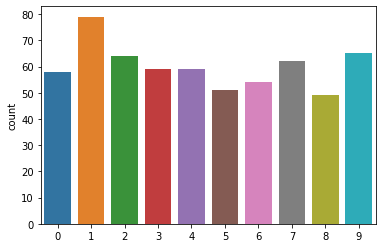

In [56]:
sns.countplot(y_train)

Si bien se observa que el dígito 1 es un poco más común al resto de dígitos en los datos de entrenamiento, no se observa un desbalance significativo que afecte el resultado. Continuamos con el planteamiento, realizando los mismos pasos del punto 2.2. pero con la menor cantidad de imágenes:

###2.4.1.Descenso de gradiente estocástico - SGD


A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/8
19/19 [==============================] - 0s 11ms/step - loss: 2.3400 - accuracy: 0.1217 - val_loss: 2.3216 - val_accuracy: 0.0900
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3170 - accuracy: 0.1050 - val_loss: 2.3028 - val_accuracy: 0.1200
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2950 - accuracy: 0.1367 - val_loss: 2.2848 - val_accuracy: 0.1400
Epoch 4/8
19/19 [==============================] - 0s 3ms/step - loss: 2.2657 - accuracy: 0.1733 - val_loss: 2.2671 - val_accuracy: 0.1800
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2534 - accuracy: 0.1767 - val_loss: 2.2495 - val_accuracy: 0.1800
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2240 - accuracy: 0.1767 - val_loss: 2.2318 - val_accuracy: 0.2000
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 2.1953 - accuracy: 0.2117 - val_loss: 2.2147 - val_accuracy: 0.2000
Epoch 8/8
4/4 [===========

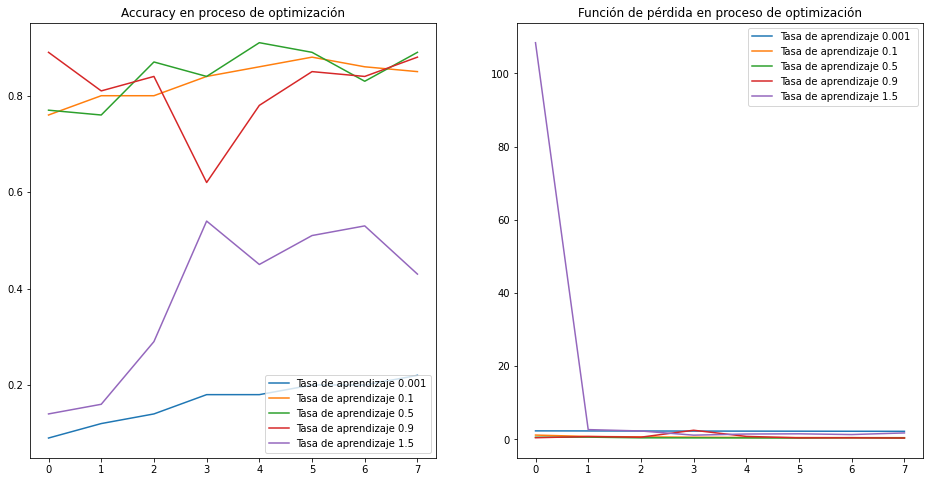

In [57]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.SGD(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historySR=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historySR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historySR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



###2.4.2. RMSprop

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/8
19/19 [==============================] - 1s 13ms/step - loss: 1.6084 - accuracy: 0.5533 - val_loss: 1.2588 - val_accuracy: 0.6900
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 0.8496 - accuracy: 0.8150 - val_loss: 0.8494 - val_accuracy: 0.7800
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 0.5884 - accuracy: 0.8550 - val_loss: 0.6896 - val_accuracy: 0.8100
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 0.4372 - accuracy: 0.8833 - val_loss: 0.5961 - val_accuracy: 0.8400
Epoch 5/8
19/19 [==============================] - 0s 6ms/step - loss: 0.3412 - accuracy: 0.9217 - val_loss: 0.5700 - val_accuracy: 0.8500
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.2735 - accuracy: 0.9333 - val_loss: 0.4582 - val_accuracy: 0.8300
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 0.2216 - accuracy: 0.9383 - val_loss: 0.4644 - val_accuracy: 0.8800
Epoch 8/8
4/4 [===========

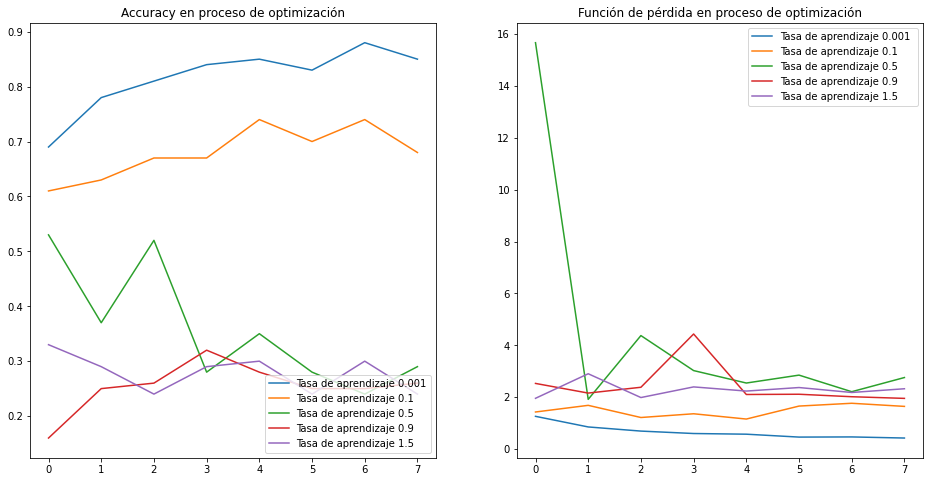

In [58]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.RMSprop(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyRR=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyRR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyRR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')


De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



###2.4.3.AdaGrad (Adaptative Gradient Algorithm o Algoritmo de Gradiente Adaptativo):



Epoch 1/8
19/19 [==============================] - 1s 11ms/step - loss: 2.3174 - accuracy: 0.0967 - val_loss: 2.2866 - val_accuracy: 0.1500
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2406 - accuracy: 0.1350 - val_loss: 2.2348 - val_accuracy: 0.1600
Epoch 3/8
19/19 [==============================] - 0s 3ms/step - loss: 2.2065 - accuracy: 0.1583 - val_loss: 2.1870 - val_accuracy: 0.1600
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 2.1550 - accuracy: 0.1933 - val_loss: 2.1435 - val_accuracy: 0.1700
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 2.0936 - accuracy: 0.2550 - val_loss: 2.1028 - val_accuracy: 0.2400
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 2.0516 - accuracy: 0.2767 - val_loss: 2.0639 - val_accuracy: 0.2800
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 2.0084 - accuracy: 0.3083 - val_loss: 2.0269 - val_accuracy: 0.3200
Epoch 8/8
4/4 [===========

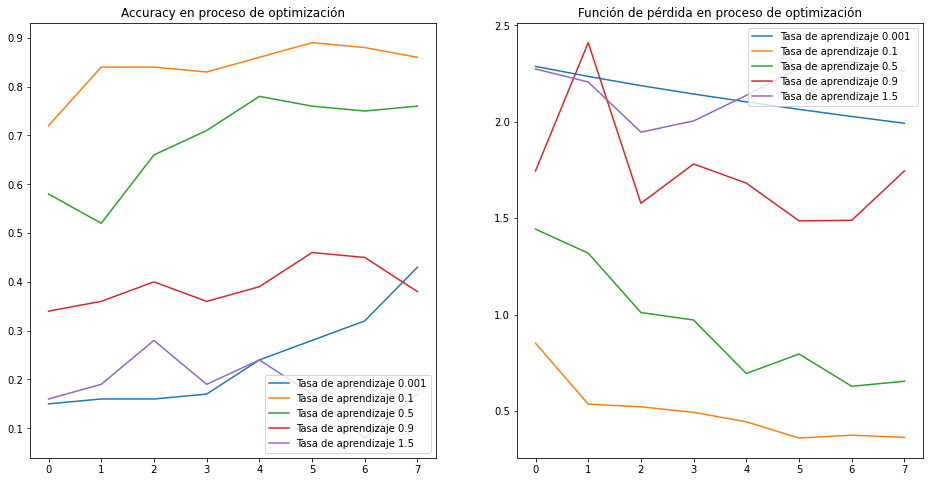

In [59]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.Adagrad(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyAR=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyAR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyAR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados se observa un mejor accuracy y por lo tanto, función de pérdida con una tasa de aprendizaje de 0.1. Mientras que los peores comportamientos respecto al accuracy de evaluación se obtuvieron con una tasa de aprendizaje 0.001 y 1.5, correspondientes al menor y mayor valor, lo cual se debe a que cuando se utiliza una tasa de aprendizaje menor el aprendizaje lleva más tiempo mientrás que con un valor mayor el punto rebotará al azar eternamente en la parte inferior con lo cual se excederá el valor mínimo.



###2.4.4.Adadelta 

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador:

Epoch 1/8
19/19 [==============================] - 1s 11ms/step - loss: 2.4099 - accuracy: 0.0800 - val_loss: 2.3602 - val_accuracy: 0.0900
Epoch 2/8
19/19 [==============================] - 0s 5ms/step - loss: 2.3979 - accuracy: 0.0717 - val_loss: 2.3583 - val_accuracy: 0.0900
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 2.4033 - accuracy: 0.0800 - val_loss: 2.3564 - val_accuracy: 0.0900
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 2.4056 - accuracy: 0.0883 - val_loss: 2.3545 - val_accuracy: 0.0900
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3834 - accuracy: 0.0850 - val_loss: 2.3526 - val_accuracy: 0.0900
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3937 - accuracy: 0.0883 - val_loss: 2.3508 - val_accuracy: 0.0900
Epoch 7/8
19/19 [==============================] - 0s 6ms/step - loss: 2.3976 - accuracy: 0.0783 - val_loss: 2.3490 - val_accuracy: 0.0900
Epoch 8/8
4/4 [===========

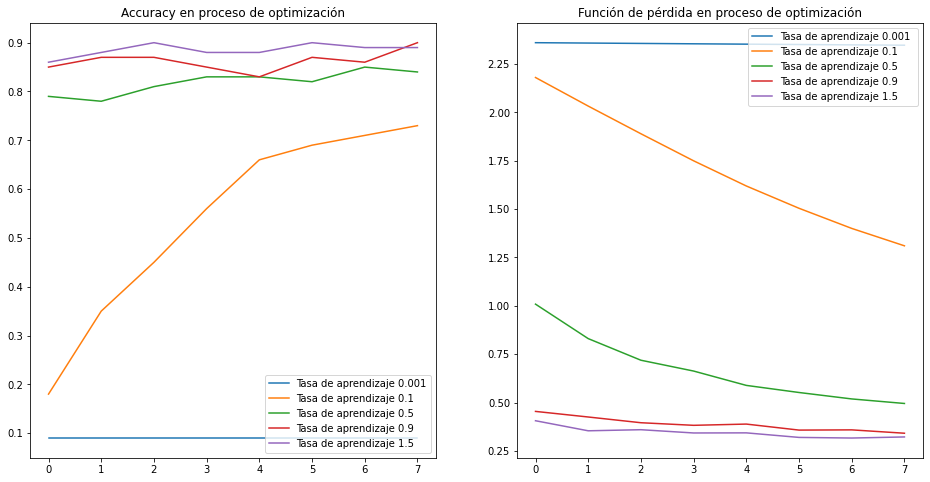

In [60]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Accuracy en proceso de optimización')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title('Función de pérdida en proceso de optimización')
for i in ([0.001,0.1,0.5,0.9,1.5]):
  opt = tf.keras.optimizers.Adadelta(learning_rate=i) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
  model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  # Se almmacena la información de accuracy y función de pérdida para poderlas graficar
  historyDR=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
  test_loss, test_accuracy = model.evaluate(x_test, y_test)
  ax.plot(historyDR.history['val_accuracy'], label='Tasa de aprendizaje {}'.format(i))
  ax1.plot(historyDR.history['val_loss'], label='Tasa de aprendizaje {} '.format(i))
  ax.legend(loc='lower right')
  ax1.legend(loc='upper right')

De acuerdo a los resultados la mejor métrica de accuracy y de función de pérdida se obtiene con una tasa de aprendizaje de 0.1, sin embargo el comportamiento de estas medidas con una tasa de aprendizaje de 0.5 es muy similar al anterior. Asimismo, el peor comportamiento respecto al accuracy de evaluación se obtuvio con una tasa de aprendizaje 0.001 dado que con este valor el aprendizaje lleva más tiempo y para el planteamiento se está utilizando una epoch de 5.



###2.4.5. Comparación optimizadores (tasa de aprendizaje 0.1)

Dado que en los ejercicios anteriores se obtuvo un mejor desempeño con una tasa de aprendizaje de 0.1, a continuación se comparan los optimizadores utilizando este hiperparámetro. La validación por optimizador y por tasa de aprendizaje se presenta en el punto 2.5. de esta entrada

In [61]:
EPOCHS = 8
optimizers_list = [
    tf.keras.optimizers.SGD(learning_rate=0.1),
    tf.keras.optimizers.RMSprop(learning_rate=0.1),
    tf.keras.optimizers.Adagrad(learning_rate=0.1),
    tf.keras.optimizers.Adadelta(learning_rate=0.1)
]


In [62]:
results = {}
history = {}
for optimizer in optimizers_list:
  model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')])

  model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  optimizer_key = str(type(optimizer).__name__)
  history[optimizer_key] = model.fit(x_train, y_train, epochs=EPOCHS,validation_data=(x_test, y_test))
  results[optimizer_key] = {}
  results[optimizer_key]["loss"] = history[optimizer_key].history['loss'][EPOCHS - 1]
  results[optimizer_key]["val_loss"] = history[optimizer_key].history['val_loss'][EPOCHS - 1]
  results[optimizer_key]["accuracy"] = history[optimizer_key].history['accuracy'][EPOCHS - 1]
  results[optimizer_key]["val_accuracy"] = history[optimizer_key].history['val_accuracy'][EPOCHS - 1]

Epoch 1/8
19/19 [==============================] - 0s 11ms/step - loss: 1.8118 - accuracy: 0.4483 - val_loss: 1.3386 - val_accuracy: 0.6900
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 0.9614 - accuracy: 0.7733 - val_loss: 0.8652 - val_accuracy: 0.7500
Epoch 3/8
19/19 [==============================] - 0s 5ms/step - loss: 0.6634 - accuracy: 0.8417 - val_loss: 0.6936 - val_accuracy: 0.8300
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 0.5304 - accuracy: 0.8633 - val_loss: 0.6180 - val_accuracy: 0.8700
Epoch 5/8
19/19 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.8933 - val_loss: 0.5904 - val_accuracy: 0.8600
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.3791 - accuracy: 0.9017 - val_loss: 0.5178 - val_accuracy: 0.8700
Epoch 7/8
19/19 [==============================] - 0s 5ms/step - loss: 0.3177 - accuracy: 0.9267 - val_loss: 0.4705 - val_accuracy: 0.8600
Epoch 8/8
19/19 [=========

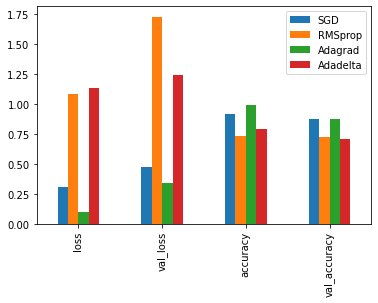

In [63]:
df_results = pd.DataFrame(results)
df_results.plot.bar()

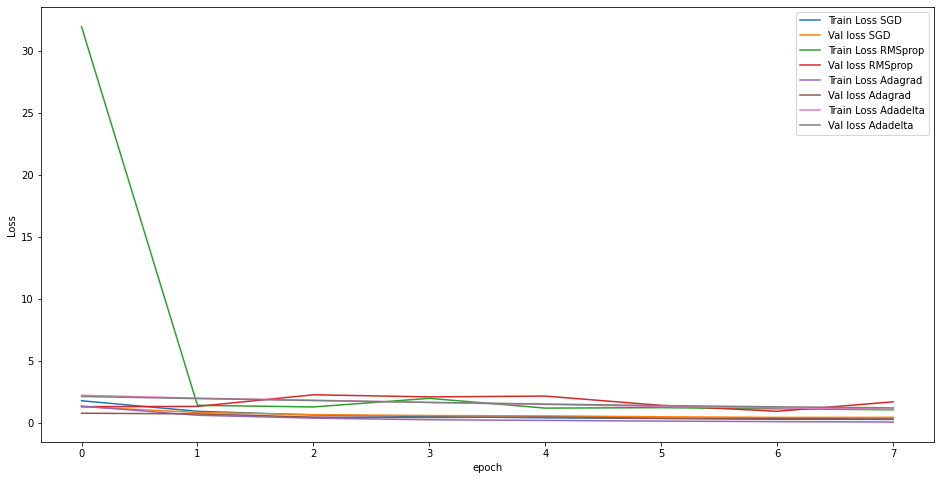

In [64]:
plt.figure(figsize=(16,8))
plt.xlabel('epoch')
plt.ylabel('Loss')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['loss']), 
           label='Train Loss '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_loss']),
           label = 'Val loss '+optimizer)
plt.legend()


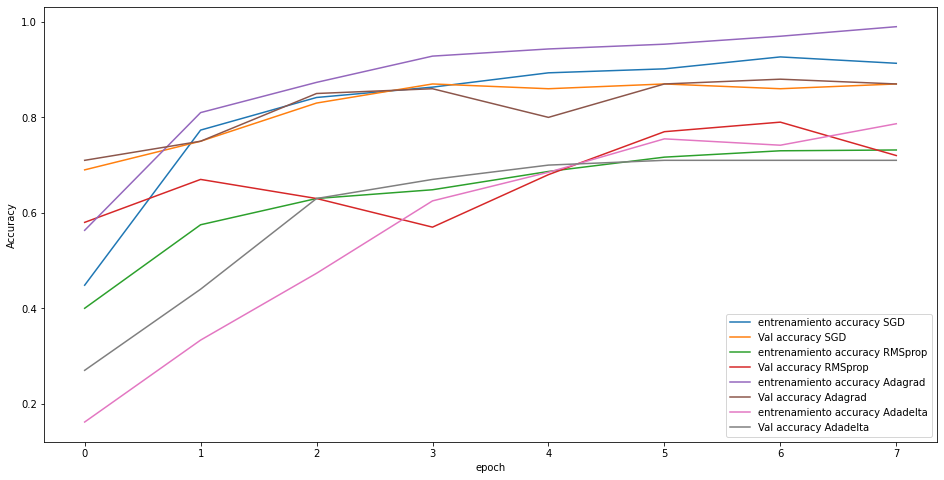

In [65]:
plt.figure(figsize=(16,8))
plt.xlabel('epoch')
plt.ylabel('Accuracy')
for optimizer in history:
  hist = pd.DataFrame(history[optimizer].history)
  plt.plot(history[optimizer].epoch, np.array(hist['accuracy']), 
           label='entrenamiento accuracy '+optimizer)
  plt.plot(history[optimizer].epoch, np.array(hist['val_accuracy']),
           label = 'Val accuracy '+optimizer)
plt.legend()


##2.5.Exploración diferentes tasas de aprendizaje


###2.5.1.Descenso de gradiente estocástico - SGD

A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.5.1.1. Tasa de aprendizaje 0.001

Epoch 1/8
19/19 [==============================] - 0s 11ms/step - loss: 2.3937 - accuracy: 0.1083 - val_loss: 2.3831 - val_accuracy: 0.0900
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3689 - accuracy: 0.1117 - val_loss: 2.3591 - val_accuracy: 0.0900
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3317 - accuracy: 0.1183 - val_loss: 2.3355 - val_accuracy: 0.0900
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3062 - accuracy: 0.1183 - val_loss: 2.3131 - val_accuracy: 0.0800
Epoch 5/8
19/19 [==============================] - 0s 3ms/step - loss: 2.2914 - accuracy: 0.1433 - val_loss: 2.2918 - val_accuracy: 0.0800
Epoch 6/8
19/19 [==============================] - 0s 3ms/step - loss: 2.2701 - accuracy: 0.1350 - val_loss: 2.2709 - val_accuracy: 0.1100
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2364 - accuracy: 0.1700 - val_loss: 2.2505 - val_accuracy: 0.1100
Epoch 8/8
4/4 [===========

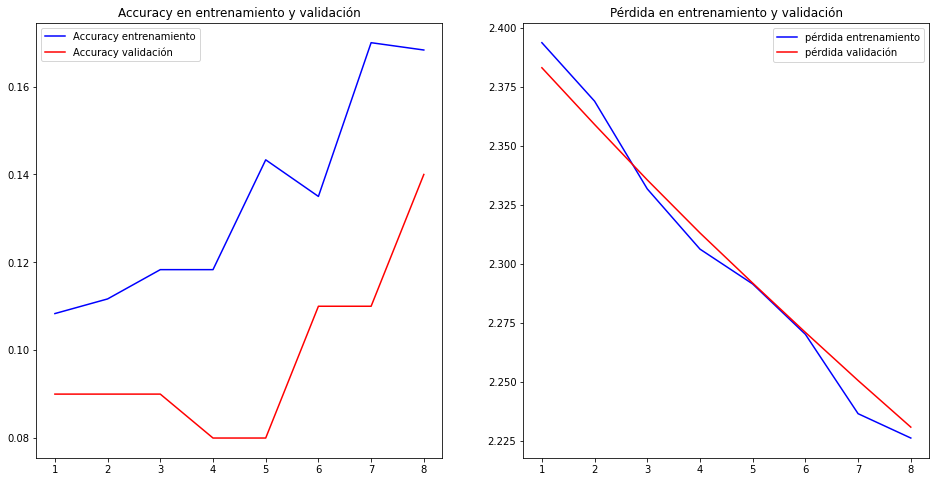

In [66]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS1R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS1R.history['loss']
val_loss = historyS1R.history['val_loss']
acc = historyS1R.history['accuracy']
val_acc = historyS1R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [67]:
print('pérdida en entrenamiento ', historyS1R.history['loss'][-1])
print('pérdida en  test         ', historyS1R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS1R.history['accuracy'][-1])
print('accuracy en test         ', historyS1R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.2261149883270264
pérdida en  test          2.2307426929473877
accuracy en entrenamiento 0.16833333671092987
accuracy en test          0.14000000059604645


####2.5.1.2. Tasa de aprendizaje 0.1

Epoch 1/8
19/19 [==============================] - 0s 11ms/step - loss: 1.7631 - accuracy: 0.4583 - val_loss: 1.3010 - val_accuracy: 0.6700
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 0.9632 - accuracy: 0.7650 - val_loss: 0.9059 - val_accuracy: 0.7600
Epoch 3/8
19/19 [==============================] - 0s 5ms/step - loss: 0.6620 - accuracy: 0.8183 - val_loss: 0.7304 - val_accuracy: 0.7800
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 0.5455 - accuracy: 0.8467 - val_loss: 0.6574 - val_accuracy: 0.8100
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 0.4569 - accuracy: 0.8717 - val_loss: 0.5864 - val_accuracy: 0.8500
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.3776 - accuracy: 0.8983 - val_loss: 0.5382 - val_accuracy: 0.8800
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 0.3486 - accuracy: 0.9033 - val_loss: 0.5064 - val_accuracy: 0.8400
Epoch 8/8
4/4 [===========

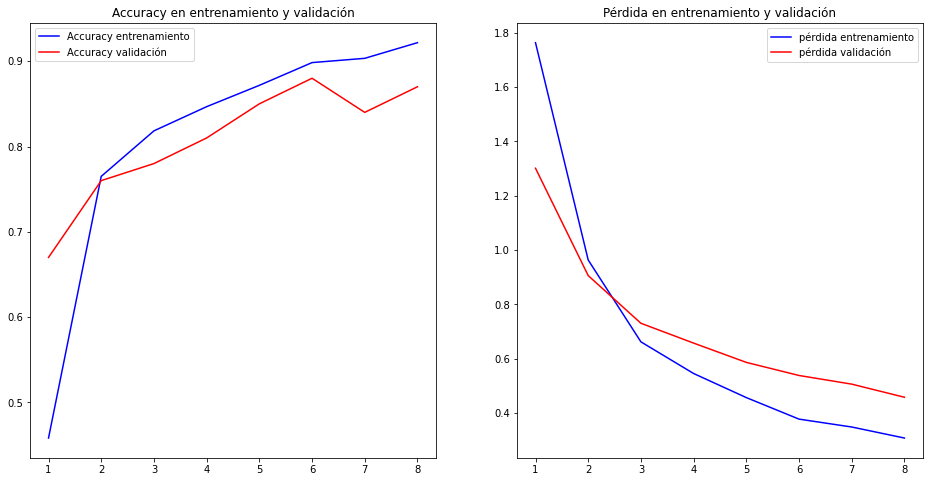

In [68]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS2R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS2R.history['loss']
val_loss = historyS2R.history['val_loss']
acc = historyS2R.history['accuracy']
val_acc = historyS2R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [69]:
print('pérdida en entrenamiento ', historyS2R.history['loss'][-1])
print('pérdida en  test         ', historyS2R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS2R.history['accuracy'][-1])
print('accuracy en test         ', historyS2R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.3080042898654938
pérdida en  test          0.45811256766319275
accuracy en entrenamiento 0.92166668176651
accuracy en test          0.8700000047683716


####2.5.1.3. Tasa de aprendizaje 0.5

Epoch 1/8
19/19 [==============================] - 1s 12ms/step - loss: 1.4051 - accuracy: 0.5617 - val_loss: 0.8841 - val_accuracy: 0.7600
Epoch 2/8
19/19 [==============================] - 0s 6ms/step - loss: 0.5467 - accuracy: 0.8467 - val_loss: 0.6920 - val_accuracy: 0.7800
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 0.3501 - accuracy: 0.8850 - val_loss: 0.5455 - val_accuracy: 0.7800
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.9250 - val_loss: 0.6987 - val_accuracy: 0.7700
Epoch 5/8
19/19 [==============================] - 0s 6ms/step - loss: 0.1380 - accuracy: 0.9650 - val_loss: 0.4102 - val_accuracy: 0.8600
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9700 - val_loss: 0.4053 - val_accuracy: 0.8200
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 0.1082 - accuracy: 0.9750 - val_loss: 0.4469 - val_accuracy: 0.8700
Epoch 8/8
4/4 [===========

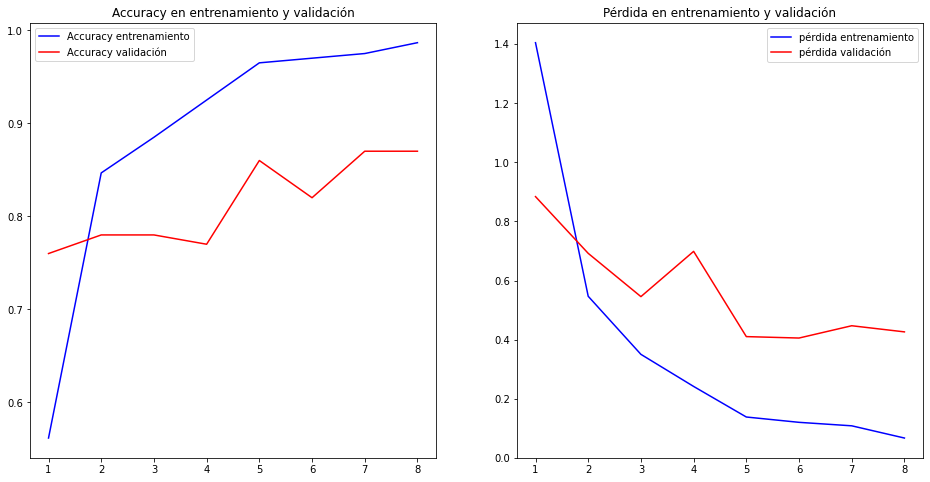

In [70]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS3R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS3R.history['loss']
val_loss = historyS3R.history['val_loss']
acc = historyS3R.history['accuracy']
val_acc = historyS3R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [71]:
print('pérdida en entrenamiento ', historyS3R.history['loss'][-1])
print('pérdida en  test         ', historyS3R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS3R.history['accuracy'][-1])
print('accuracy en test         ', historyS3R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.06683213263750076
pérdida en  test          0.4261683523654938
accuracy en entrenamiento 0.9866666793823242
accuracy en test          0.8700000047683716


####2.5.1.4. Tasa de aprendizaje 0.9

Epoch 1/8
19/19 [==============================] - 1s 14ms/step - loss: 2.1617 - accuracy: 0.3500 - val_loss: 1.5465 - val_accuracy: 0.5100
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 1.3441 - accuracy: 0.5883 - val_loss: 1.4150 - val_accuracy: 0.5200
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 1.0018 - accuracy: 0.6750 - val_loss: 0.7814 - val_accuracy: 0.7500
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 0.6599 - accuracy: 0.7967 - val_loss: 0.6736 - val_accuracy: 0.7600
Epoch 5/8
19/19 [==============================] - 0s 5ms/step - loss: 0.5757 - accuracy: 0.8217 - val_loss: 0.5820 - val_accuracy: 0.7600
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.4024 - accuracy: 0.8633 - val_loss: 0.4623 - val_accuracy: 0.8000
Epoch 7/8
19/19 [==============================] - 0s 6ms/step - loss: 0.3473 - accuracy: 0.8833 - val_loss: 0.4937 - val_accuracy: 0.8700
Epoch 8/8
4/4 [===========

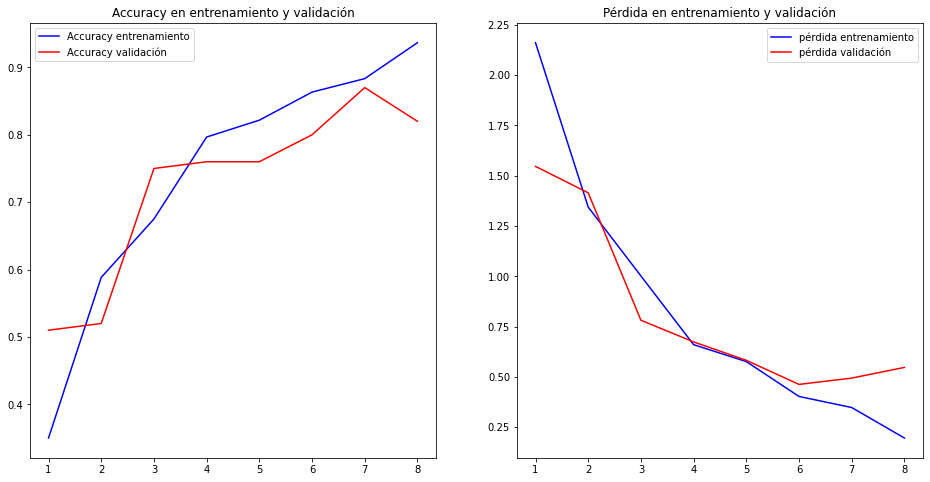

In [72]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS4R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS4R.history['loss']
val_loss = historyS4R.history['val_loss']
acc = historyS4R.history['accuracy']
val_acc = historyS4R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [73]:
print('pérdida en entrenamiento ', historyS4R.history['loss'][-1])
print('pérdida en  test         ', historyS4R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS4R.history['accuracy'][-1])
print('accuracy en test         ', historyS4R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.19557280838489532
pérdida en  test          0.5467537045478821
accuracy en entrenamiento 0.9366666674613953
accuracy en test          0.8199999928474426


####2.5.1.5. Tasa de aprendizaje 1.5

Epoch 1/8
19/19 [==============================] - 1s 11ms/step - loss: 2.9553 - accuracy: 0.2150 - val_loss: 1.8163 - val_accuracy: 0.3400
Epoch 2/8
19/19 [==============================] - 0s 6ms/step - loss: 2.1395 - accuracy: 0.2983 - val_loss: 1.6920 - val_accuracy: 0.4100
Epoch 3/8
19/19 [==============================] - 0s 5ms/step - loss: 2.0794 - accuracy: 0.2967 - val_loss: 1.5877 - val_accuracy: 0.4500
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 1.6707 - accuracy: 0.3767 - val_loss: 1.6387 - val_accuracy: 0.3700
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 1.8340 - accuracy: 0.3183 - val_loss: 1.7283 - val_accuracy: 0.3900
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 1.9098 - accuracy: 0.3100 - val_loss: 1.7860 - val_accuracy: 0.3200
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 1.8507 - accuracy: 0.3100 - val_loss: 1.6726 - val_accuracy: 0.3700
Epoch 8/8
4/4 [===========

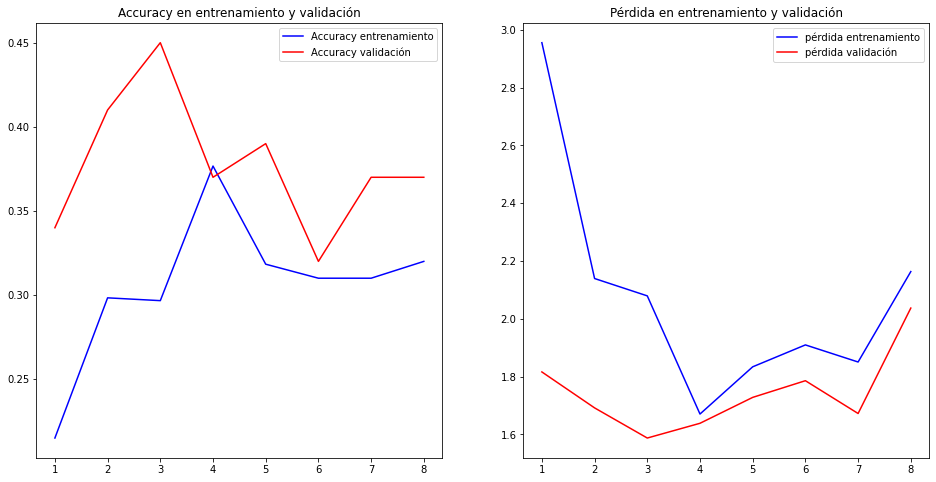

In [74]:
#Optimizador SGD
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.SGD(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyS5R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyS5R.history['loss']
val_loss = historyS5R.history['val_loss']
acc = historyS5R.history['accuracy']
val_acc = historyS5R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [75]:
print('pérdida en entrenamiento ', historyS5R.history['loss'][-1])
print('pérdida en validación    ', historyS5R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyS5R.history['accuracy'][-1])
print('accuracy en validación   ', historyS5R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.1634809970855713
pérdida en validación     2.037243604660034
accuracy en entrenamiento 0.3199999928474426
accuracy en validación    0.3700000047683716


####2.5.1.6. Comparación optimizador SGD total vs dataset reducido

In [76]:
print('0.001', 'accuracy en entrenamiento Total', historyS1.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS1R.history['accuracy'][-1])
print('0.001','accuracy en validación Total  ', historyS1.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS1R.history['val_accuracy'][-1])
print('0.1', 'accuracy en entrenamiento Total', historyS2.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS2R.history['accuracy'][-1])
print('0.1','accuracy en validación Total  ', historyS2.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS2R.history['val_accuracy'][-1])
print('0.5', 'accuracy en entrenamiento Total', historyS3.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS3R.history['accuracy'][-1])
print('0.5','accuracy en validación Total  ', historyS3.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS3R.history['val_accuracy'][-1])
print('0.9', 'accuracy en entrenamiento Total', historyS4.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS4R.history['accuracy'][-1])
print('0.9','accuracy en validación Total  ', historyS4.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS4R.history['val_accuracy'][-1])
print('1.5', 'accuracy en entrenamiento Total', historyS5.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyS5R.history['accuracy'][-1])
print('1.5','accuracy en validación Total  ', historyS5.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyS5R.history['val_accuracy'][-1])

0.001 accuracy en entrenamiento Total 0.8673666715621948 accuracy en entrenamiento Total 0.16833333671092987
0.001 accuracy en validación Total   0.9000999927520752 accuracy en validación reduc   0.14000000059604645
0.1 accuracy en entrenamiento Total 0.9770166873931885 accuracy en entrenamiento Total 0.92166668176651
0.1 accuracy en validación Total   0.9769999980926514 accuracy en validación reduc   0.8700000047683716
0.5 accuracy en entrenamiento Total 0.9723666906356812 accuracy en entrenamiento Total 0.9866666793823242
0.5 accuracy en validación Total   0.9706000089645386 accuracy en validación reduc   0.8700000047683716
0.9 accuracy en entrenamiento Total 0.9442333579063416 accuracy en entrenamiento Total 0.9366666674613953
0.9 accuracy en validación Total   0.9610999822616577 accuracy en validación reduc   0.8199999928474426
1.5 accuracy en entrenamiento Total 0.23813332617282867 accuracy en entrenamiento Total 0.3199999928474426
1.5 accuracy en validación Total   0.283100008964

###2.5.2. RMSprop

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador, con diferentes tasas de aprendizaje

####2.5.2.1. Tasa de aprendizaje 0.001

Epoch 1/8
19/19 [==============================] - 1s 13ms/step - loss: 1.5617 - accuracy: 0.6000 - val_loss: 1.0827 - val_accuracy: 0.7500
Epoch 2/8
19/19 [==============================] - 0s 5ms/step - loss: 0.8398 - accuracy: 0.8083 - val_loss: 0.7818 - val_accuracy: 0.8300
Epoch 3/8
19/19 [==============================] - 0s 6ms/step - loss: 0.5695 - accuracy: 0.8683 - val_loss: 0.6614 - val_accuracy: 0.8300
Epoch 4/8
19/19 [==============================] - 0s 6ms/step - loss: 0.4369 - accuracy: 0.8917 - val_loss: 0.5550 - val_accuracy: 0.8500
Epoch 5/8
19/19 [==============================] - 0s 5ms/step - loss: 0.3474 - accuracy: 0.9083 - val_loss: 0.4617 - val_accuracy: 0.8600
Epoch 6/8
19/19 [==============================] - 0s 5ms/step - loss: 0.2957 - accuracy: 0.9283 - val_loss: 0.4457 - val_accuracy: 0.8300
Epoch 7/8
19/19 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.9367 - val_loss: 0.4153 - val_accuracy: 0.8500
Epoch 8/8
4/4 [===========

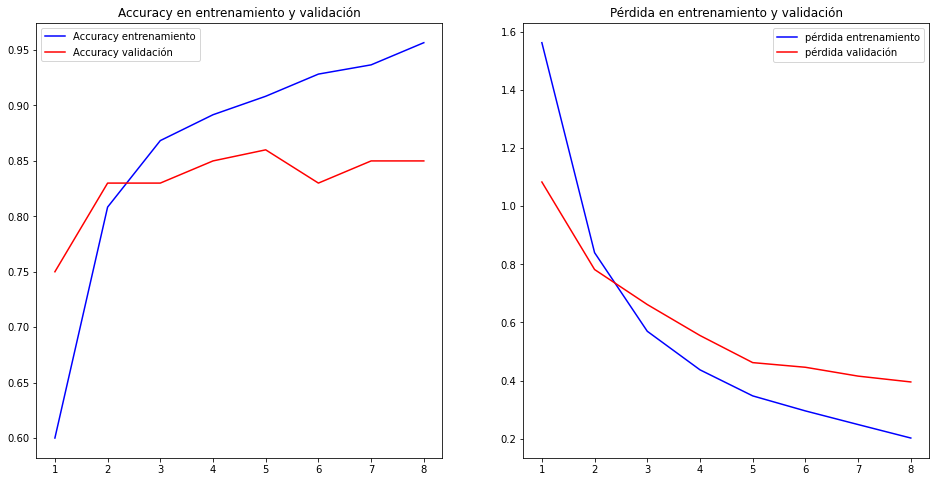

In [77]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR1R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR1R.history['loss']
val_loss = historyR1R.history['val_loss']
acc = historyR1R.history['accuracy']
val_acc = historyR1R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [78]:
print('pérdida en entrenamiento ', historyR1R.history['loss'][-1])
print('pérdida en validación    ', historyR1R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR1R.history['accuracy'][-1])
print('accuracy en validación   ', historyR1R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.2024412602186203
pérdida en validación     0.3952588140964508
accuracy en entrenamiento 0.9566666483879089
accuracy en validación    0.8500000238418579


####2.5.2.2. Tasa de aprendizaje 0.1

Epoch 1/8
19/19 [==============================] - 1s 14ms/step - loss: 43.5503 - accuracy: 0.3967 - val_loss: 1.6824 - val_accuracy: 0.6000
Epoch 2/8
19/19 [==============================] - 0s 5ms/step - loss: 1.0544 - accuracy: 0.7050 - val_loss: 1.4564 - val_accuracy: 0.6100
Epoch 3/8
19/19 [==============================] - 0s 5ms/step - loss: 1.7903 - accuracy: 0.6100 - val_loss: 3.7723 - val_accuracy: 0.4700
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 1.4229 - accuracy: 0.6783 - val_loss: 1.3695 - val_accuracy: 0.7400
Epoch 5/8
19/19 [==============================] - 0s 5ms/step - loss: 1.3035 - accuracy: 0.7017 - val_loss: 1.5255 - val_accuracy: 0.6500
Epoch 6/8
19/19 [==============================] - 0s 6ms/step - loss: 1.0298 - accuracy: 0.7283 - val_loss: 2.4538 - val_accuracy: 0.6700
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 1.2413 - accuracy: 0.7550 - val_loss: 1.8603 - val_accuracy: 0.6600
Epoch 8/8
4/4 [==========

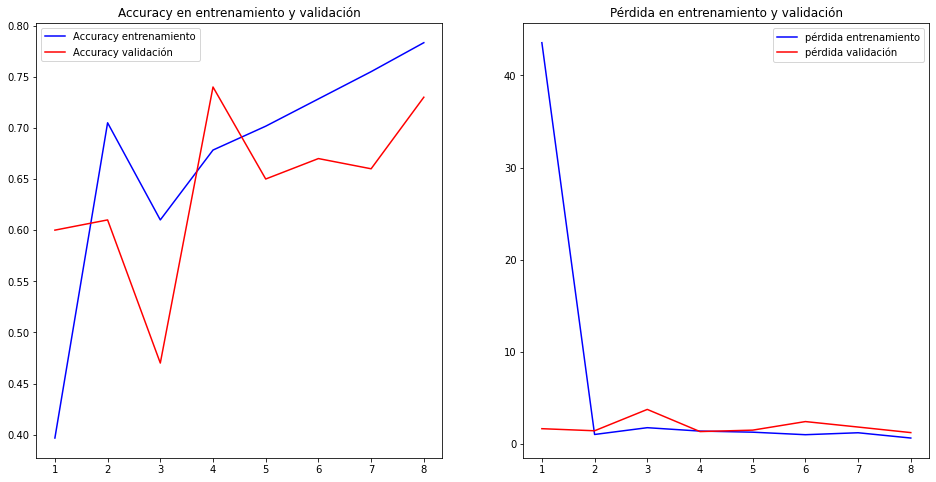

In [79]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR2R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR2R.history['loss']
val_loss = historyR2R.history['val_loss']
acc = historyR2R.history['accuracy']
val_acc = historyR2R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [80]:
print('pérdida en entrenamiento ', historyR2R.history['loss'][-1])
print('pérdida en validación    ', historyR2R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR2R.history['accuracy'][-1])
print('accuracy en validación   ', historyR2R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.6687977313995361
pérdida en validación     1.2581957578659058
accuracy en entrenamiento 0.7833333611488342
accuracy en validación    0.7300000190734863


####2.5.2.3. Tasa de aprendizaje 0.5

Epoch 1/8
19/19 [==============================] - 1s 12ms/step - loss: 897.0172 - accuracy: 0.3700 - val_loss: 13.7996 - val_accuracy: 0.4400
Epoch 2/8
19/19 [==============================] - 0s 5ms/step - loss: 5.4393 - accuracy: 0.4933 - val_loss: 8.3871 - val_accuracy: 0.4400
Epoch 3/8
19/19 [==============================] - 0s 6ms/step - loss: 4.9984 - accuracy: 0.4850 - val_loss: 6.2542 - val_accuracy: 0.3100
Epoch 4/8
19/19 [==============================] - 0s 6ms/step - loss: 6.7484 - accuracy: 0.4133 - val_loss: 128.9775 - val_accuracy: 0.2400
Epoch 5/8
19/19 [==============================] - 0s 5ms/step - loss: 10.6807 - accuracy: 0.3417 - val_loss: 2.7349 - val_accuracy: 0.3600
Epoch 6/8
19/19 [==============================] - 0s 5ms/step - loss: 3.5109 - accuracy: 0.3467 - val_loss: 2.7838 - val_accuracy: 0.2800
Epoch 7/8
19/19 [==============================] - 0s 5ms/step - loss: 2.0088 - accuracy: 0.3600 - val_loss: 5.4375 - val_accuracy: 0.3100
Epoch 8/8
4/4 [=====

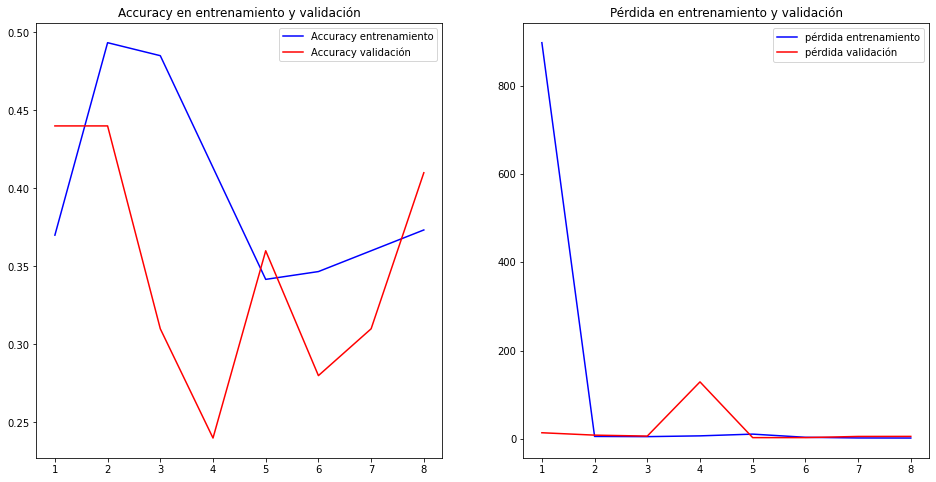

In [81]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR3R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR3R.history['loss']
val_loss = historyR3R.history['val_loss']
acc = historyR3R.history['accuracy']
val_acc = historyR3R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [82]:
print('pérdida en entrenamiento ', historyR3R.history['loss'][-1])
print('pérdida en validación    ', historyR3R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR3R.history['accuracy'][-1])
print('accuracy en validación   ', historyR3R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.8345316648483276
pérdida en validación     5.549904823303223
accuracy en entrenamiento 0.3733333349227905
accuracy en validación    0.4099999964237213


####2.5.2.4. Tasa de aprendizaje 0.9

Epoch 1/8
19/19 [==============================] - 1s 13ms/step - loss: 2505.5220 - accuracy: 0.4300 - val_loss: 15.7038 - val_accuracy: 0.4800
Epoch 2/8
19/19 [==============================] - 0s 5ms/step - loss: 9.4793 - accuracy: 0.5117 - val_loss: 7.0596 - val_accuracy: 0.4200
Epoch 3/8
19/19 [==============================] - 0s 5ms/step - loss: 14.7941 - accuracy: 0.4517 - val_loss: 3.7533 - val_accuracy: 0.4700
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 2.8600 - accuracy: 0.4050 - val_loss: 3.5036 - val_accuracy: 0.4600
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 56.3877 - accuracy: 0.3917 - val_loss: 1.6123 - val_accuracy: 0.4200
Epoch 6/8
19/19 [==============================] - 0s 6ms/step - loss: 31.4450 - accuracy: 0.4250 - val_loss: 2.1109 - val_accuracy: 0.4300
Epoch 7/8
19/19 [==============================] - 0s 6ms/step - loss: 1.9293 - accuracy: 0.4283 - val_loss: 1.6510 - val_accuracy: 0.4600
Epoch 8/8
4/4 [====

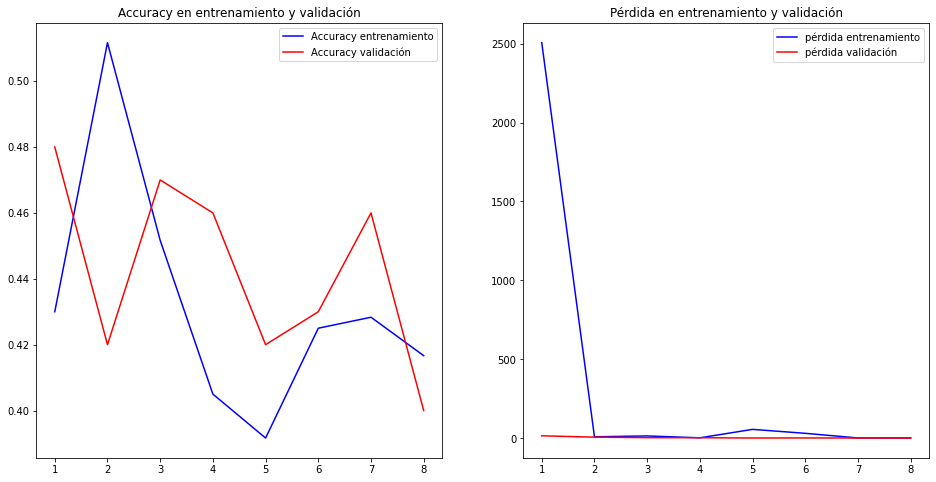

In [83]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


historyR4R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR4R.history['loss']
val_loss = historyR4R.history['val_loss']
acc = historyR4R.history['accuracy']
val_acc = historyR4R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [84]:
print('pérdida en entrenamiento ', historyR4R.history['loss'][-1])
print('pérdida en validación    ', historyR4R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR4R.history['accuracy'][-1])
print('accuracy en validación   ', historyR4R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.916602611541748
pérdida en validación     1.5579419136047363
accuracy en entrenamiento 0.4166666567325592
accuracy en validación    0.4000000059604645


####2.5.2.5. Tasa de aprendizaje 1.5

Epoch 1/8
19/19 [==============================] - 1s 12ms/step - loss: 8796.1807 - accuracy: 0.4300 - val_loss: 288.4235 - val_accuracy: 0.5700
Epoch 2/8
19/19 [==============================] - 0s 6ms/step - loss: 101.1518 - accuracy: 0.5833 - val_loss: 37.9236 - val_accuracy: 0.4100
Epoch 3/8
19/19 [==============================] - 0s 6ms/step - loss: 15.1888 - accuracy: 0.5417 - val_loss: 52.5772 - val_accuracy: 0.5000
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 82.1906 - accuracy: 0.4700 - val_loss: 42.3745 - val_accuracy: 0.3200
Epoch 5/8
19/19 [==============================] - 0s 5ms/step - loss: 10.8657 - accuracy: 0.4200 - val_loss: 28.1236 - val_accuracy: 0.3100
Epoch 6/8
19/19 [==============================] - 0s 6ms/step - loss: 37.4713 - accuracy: 0.3933 - val_loss: 27.9623 - val_accuracy: 0.2000
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 47.6971 - accuracy: 0.3767 - val_loss: 5.0289 - val_accuracy: 0.2800
Epoch 8/8

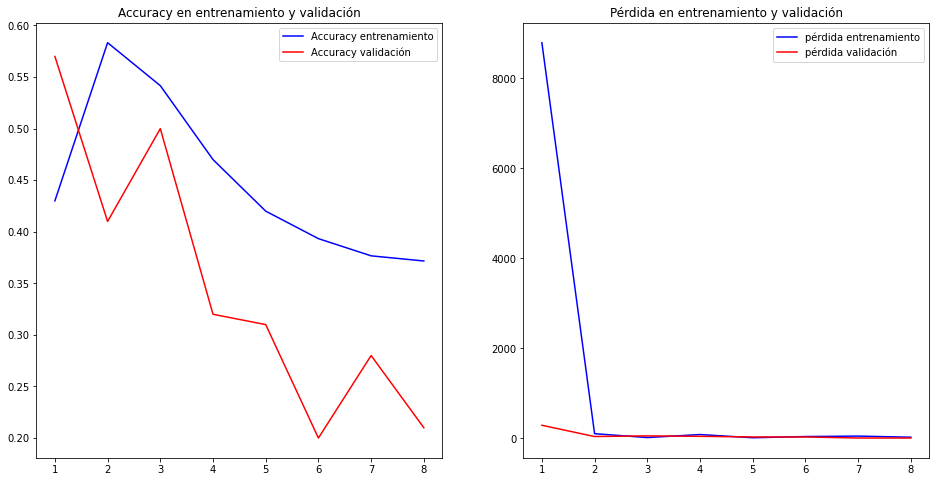

In [85]:
#Optimizador RMSprop
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.RMSprop(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyR5R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyR5R.history['loss']
val_loss = historyR5R.history['val_loss']
acc = historyR5R.history['accuracy']
val_acc = historyR5R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [86]:
print('pérdida en entrenamiento ', historyR5R.history['loss'][-1])
print('pérdida en validación    ', historyR5R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyR5R.history['accuracy'][-1])
print('accuracy en validación   ', historyR5R.history['val_accuracy'][-1])

pérdida en entrenamiento  22.87200927734375
pérdida en validación     4.478188514709473
accuracy en entrenamiento 0.37166666984558105
accuracy en validación    0.20999999344348907


####2.5.2.6. Comparación optimizador RSMpro total vs dataset reducido

In [87]:
print('0.001', 'accuracy en entrenamiento Total', historyR1.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR1R.history['accuracy'][-1])
print('0.001','accuracy en validación Total  ', historyR1.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR1R.history['val_accuracy'][-1])
print('0.1', 'accuracy en entrenamiento Total', historyR2.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR2R.history['accuracy'][-1])
print('0.1','accuracy en validación Total  ', historyR2.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR2R.history['val_accuracy'][-1])
print('0.5', 'accuracy en entrenamiento Total', historyR3.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR3R.history['accuracy'][-1])
print('0.5','accuracy en validación Total  ', historyR3.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR3R.history['val_accuracy'][-1])
print('0.9', 'accuracy en entrenamiento Total', historyR4.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR4R.history['accuracy'][-1])
print('0.9','accuracy en validación Total  ', historyR4.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR4R.history['val_accuracy'][-1])
print('1.5', 'accuracy en entrenamiento Total', historyR5.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyR5R.history['accuracy'][-1])
print('1.5','accuracy en validación Total  ', historyR5.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyR5R.history['val_accuracy'][-1])

0.001 accuracy en entrenamiento Total 0.9778500199317932 accuracy en entrenamiento Total 0.9566666483879089
0.001 accuracy en validación Total   0.977400004863739 accuracy en validación reduc   0.8500000238418579
0.1 accuracy en entrenamiento Total 0.6849499940872192 accuracy en entrenamiento Total 0.7833333611488342
0.1 accuracy en validación Total   0.7358999848365784 accuracy en validación reduc   0.7300000190734863
0.5 accuracy en entrenamiento Total 0.2461666613817215 accuracy en entrenamiento Total 0.3733333349227905
0.5 accuracy en validación Total   0.27140000462532043 accuracy en validación reduc   0.4099999964237213
0.9 accuracy en entrenamiento Total 0.13255000114440918 accuracy en entrenamiento Total 0.4166666567325592
0.9 accuracy en validación Total   0.12389999628067017 accuracy en validación reduc   0.4000000059604645
1.5 accuracy en entrenamiento Total 0.1413833349943161 accuracy en entrenamiento Total 0.37166666984558105
1.5 accuracy en validación Total   0.1580000072

###2.5.3.AdaGrad (Adaptative Gradient Algorithm o Algoritmo de Gradiente Adaptativo):

A continuación, se grafica la función de pérdida de entrenamiento y validación para cada una de las tasas de aprendizaje

####2.5.3.1. Tasa de aprendizaje 0.001

Epoch 1/8
19/19 [==============================] - 1s 12ms/step - loss: 2.3069 - accuracy: 0.1083 - val_loss: 2.2120 - val_accuracy: 0.1700
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2706 - accuracy: 0.1133 - val_loss: 2.1683 - val_accuracy: 0.2300
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2000 - accuracy: 0.2033 - val_loss: 2.1282 - val_accuracy: 0.3000
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 2.1559 - accuracy: 0.2233 - val_loss: 2.0911 - val_accuracy: 0.3400
Epoch 5/8
19/19 [==============================] - 0s 5ms/step - loss: 2.1135 - accuracy: 0.2833 - val_loss: 2.0565 - val_accuracy: 0.3700
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 2.0663 - accuracy: 0.3600 - val_loss: 2.0243 - val_accuracy: 0.3900
Epoch 7/8
19/19 [==============================] - 0s 5ms/step - loss: 2.0248 - accuracy: 0.3700 - val_loss: 1.9926 - val_accuracy: 0.4300
Epoch 8/8
4/4 [===========

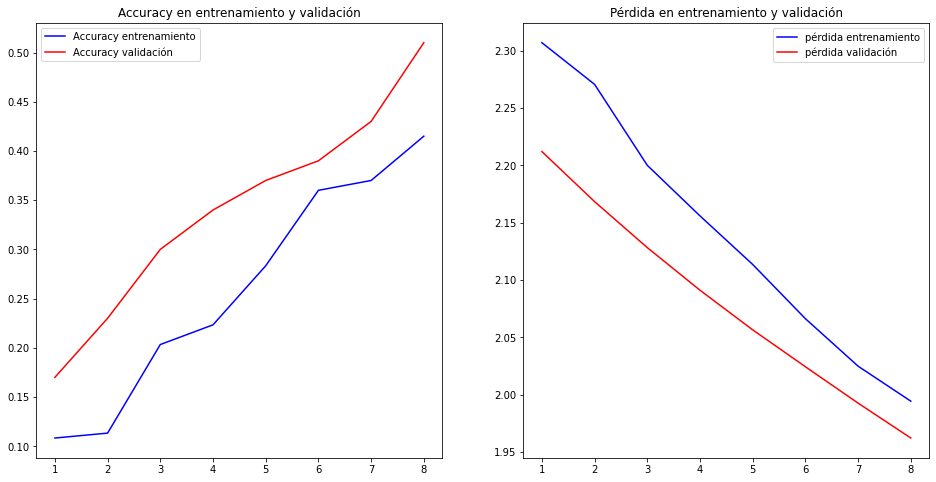

In [88]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA1R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA1R.history['loss']
val_loss = historyA1R.history['val_loss']
acc = historyA1R.history['accuracy']
val_acc = historyA1R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [89]:
print('pérdida en entrenamiento ', historyA1R.history['loss'][-1])
print('pérdida en  test         ', historyA1R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA1R.history['accuracy'][-1])
print('accuracy en test         ', historyA1R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.9942978620529175
pérdida en  test          1.962155818939209
accuracy en entrenamiento 0.41499999165534973
accuracy en test          0.5099999904632568


####2.5.3.2. Tasa de aprendizaje 0.1

Epoch 1/8
19/19 [==============================] - 1s 13ms/step - loss: 1.3684 - accuracy: 0.5550 - val_loss: 1.0847 - val_accuracy: 0.6100
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 0.6318 - accuracy: 0.8133 - val_loss: 0.6168 - val_accuracy: 0.7500
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 0.3747 - accuracy: 0.8917 - val_loss: 0.4796 - val_accuracy: 0.8100
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 0.2828 - accuracy: 0.9250 - val_loss: 0.4671 - val_accuracy: 0.8200
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 0.2266 - accuracy: 0.9383 - val_loss: 0.4162 - val_accuracy: 0.8600
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.9633 - val_loss: 0.3762 - val_accuracy: 0.8800
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 0.1476 - accuracy: 0.9650 - val_loss: 0.3778 - val_accuracy: 0.8600
Epoch 8/8
4/4 [===========

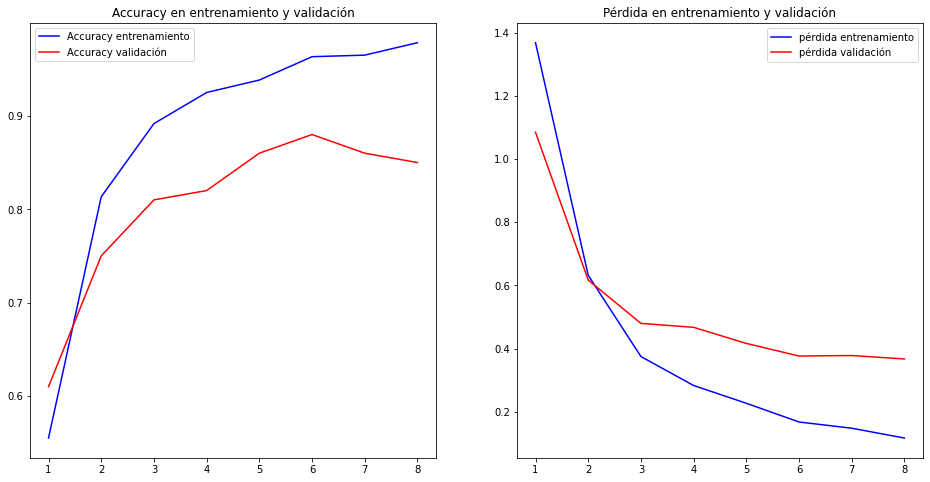

In [90]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA2R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA2R.history['loss']
val_loss = historyA2R.history['val_loss']
acc = historyA2R.history['accuracy']
val_acc = historyA2R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [91]:
print('pérdida en entrenamiento ', historyA2R.history['loss'][-1])
print('pérdida en  test         ', historyA2R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA2R.history['accuracy'][-1])
print('accuracy en test         ', historyA2R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.11653438210487366
pérdida en  test          0.36686572432518005
accuracy en entrenamiento 0.9783333539962769
accuracy en test          0.8500000238418579


####2.5.3.3. Tasa de aprendizaje 0.5

Epoch 1/8
19/19 [==============================] - 1s 12ms/step - loss: 3.2168 - accuracy: 0.2717 - val_loss: 2.0563 - val_accuracy: 0.1800
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 2.0596 - accuracy: 0.2700 - val_loss: 1.6553 - val_accuracy: 0.4600
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 1.8034 - accuracy: 0.3467 - val_loss: 1.3570 - val_accuracy: 0.6000
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 1.4855 - accuracy: 0.4417 - val_loss: 1.2802 - val_accuracy: 0.5500
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 1.3571 - accuracy: 0.5033 - val_loss: 1.2632 - val_accuracy: 0.5500
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 1.2692 - accuracy: 0.5217 - val_loss: 1.1171 - val_accuracy: 0.5900
Epoch 7/8
19/19 [==============================] - 0s 5ms/step - loss: 1.1988 - accuracy: 0.5650 - val_loss: 1.1800 - val_accuracy: 0.5800
Epoch 8/8
4/4 [===========

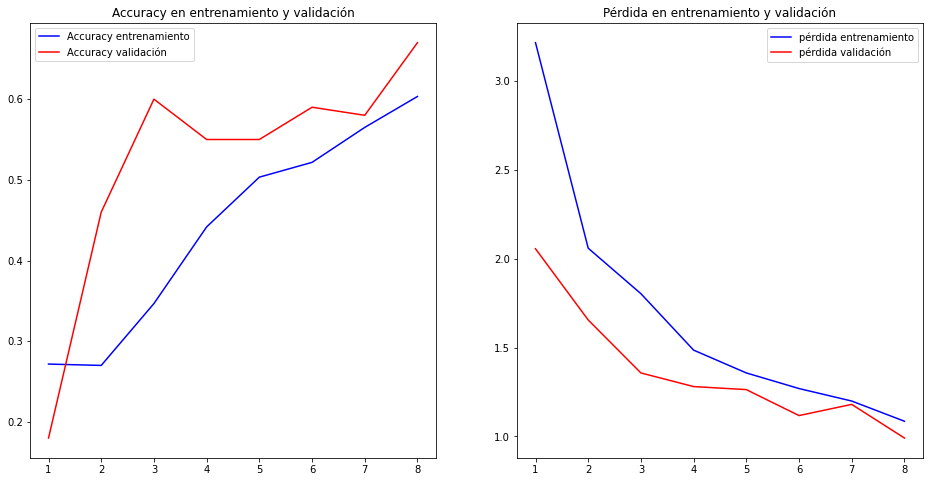

In [92]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA3R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA3R.history['loss']
val_loss = historyA3R.history['val_loss']
acc = historyA3R.history['accuracy']
val_acc = historyA3R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [93]:
print('pérdida en entrenamiento ', historyA3R.history['loss'][-1])
print('pérdida en  test         ', historyA3R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA3R.history['accuracy'][-1])
print('accuracy en test         ', historyA3R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.0851249694824219
pérdida en  test          0.9905171394348145
accuracy en entrenamiento 0.6033333539962769
accuracy en test          0.6700000166893005


####2.5.3.4. Tasa de aprendizaje 0.9

Epoch 1/8
19/19 [==============================] - 0s 11ms/step - loss: 10.5498 - accuracy: 0.1217 - val_loss: 2.4010 - val_accuracy: 0.0700
Epoch 2/8
19/19 [==============================] - 0s 5ms/step - loss: 2.4144 - accuracy: 0.1183 - val_loss: 2.2740 - val_accuracy: 0.1500
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 2.4329 - accuracy: 0.1367 - val_loss: 2.2868 - val_accuracy: 0.1400
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3099 - accuracy: 0.1250 - val_loss: 2.2744 - val_accuracy: 0.1400
Epoch 5/8
19/19 [==============================] - 0s 3ms/step - loss: 2.3051 - accuracy: 0.1283 - val_loss: 2.2872 - val_accuracy: 0.1400
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3040 - accuracy: 0.1233 - val_loss: 2.2782 - val_accuracy: 0.1400
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3051 - accuracy: 0.1317 - val_loss: 2.2722 - val_accuracy: 0.1400
Epoch 8/8
4/4 [==========

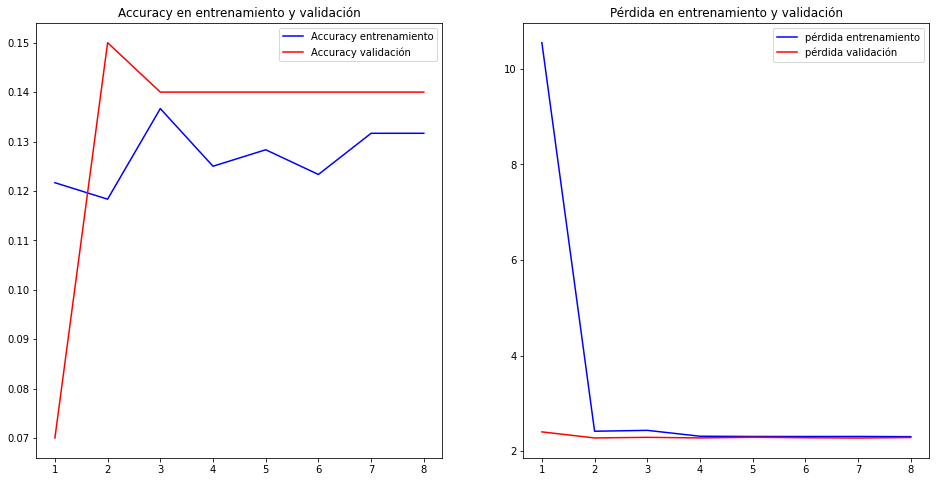

In [94]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA4R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA4R.history['loss']
val_loss = historyA4R.history['val_loss']
acc = historyA4R.history['accuracy']
val_acc = historyA4R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [95]:
print('pérdida en entrenamiento ', historyA4R.history['loss'][-1])
print('pérdida en  test         ', historyA4R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA4R.history['accuracy'][-1])
print('accuracy en test         ', historyA4R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.300910234451294
pérdida en  test          2.282670021057129
accuracy en entrenamiento 0.1316666603088379
accuracy en test          0.14000000059604645


####2.5.3.5. Tasa de aprendizaje 1.5

Epoch 1/8
19/19 [==============================] - 1s 11ms/step - loss: 19.2405 - accuracy: 0.1333 - val_loss: 2.2638 - val_accuracy: 0.1900
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3341 - accuracy: 0.1083 - val_loss: 2.2805 - val_accuracy: 0.0800
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3432 - accuracy: 0.1183 - val_loss: 2.2784 - val_accuracy: 0.1800
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 2.3031 - accuracy: 0.1133 - val_loss: 3.9867 - val_accuracy: 0.0800
Epoch 5/8
19/19 [==============================] - 0s 6ms/step - loss: 2.4588 - accuracy: 0.1033 - val_loss: 2.2813 - val_accuracy: 0.1000
Epoch 6/8
19/19 [==============================] - 0s 5ms/step - loss: 2.3178 - accuracy: 0.1200 - val_loss: 2.2687 - val_accuracy: 0.1400
Epoch 7/8
19/19 [==============================] - 0s 5ms/step - loss: 2.3129 - accuracy: 0.1117 - val_loss: 2.2996 - val_accuracy: 0.1400
Epoch 8/8
4/4 [==========

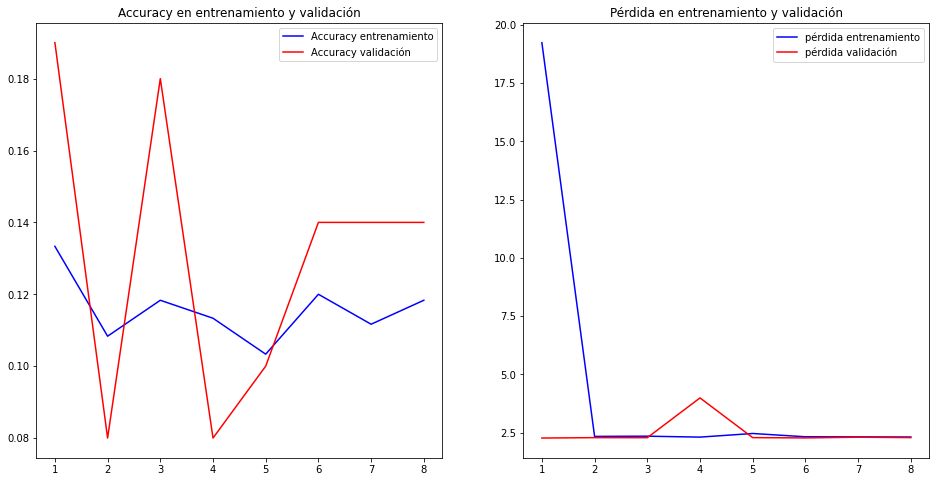

In [96]:
#Optimizador Adagrad
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#Se define e optimizador y su tasa de aprendizaje
opt = tf.keras.optimizers.Adagrad(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Se almmacena la información de accuracy y función de pérdida para poderlas graficar
historyA5R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyA5R.history['loss']
val_loss = historyA5R.history['val_loss']
acc = historyA5R.history['accuracy']
val_acc = historyA5R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()


In [97]:
print('pérdida en entrenamiento ', historyA5R.history['loss'][-1])
print('pérdida en  test         ', historyA5R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyA5R.history['accuracy'][-1])
print('accuracy en test         ', historyA5R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.307154417037964
pérdida en  test          2.281501531600952
accuracy en entrenamiento 0.11833333224058151
accuracy en test          0.14000000059604645


####2.5.3.6. Comparación optimizador AdaGrad total vs dataset reducido

In [98]:
print('0.001', 'accuracy en entrenamiento Total', historyA1.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA1R.history['accuracy'][-1])
print('0.001','accuracy en validación Total  ', historyA1.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA1R.history['val_accuracy'][-1])
print('0.1', 'accuracy en entrenamiento Total', historyA2.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA2R.history['accuracy'][-1])
print('0.1','accuracy en validación Total  ', historyA2.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA2R.history['val_accuracy'][-1])
print('0.5', 'accuracy en entrenamiento Total', historyA3.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA3R.history['accuracy'][-1])
print('0.5','accuracy en validación Total  ', historyA3.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA3R.history['val_accuracy'][-1])
print('0.9', 'accuracy en entrenamiento Total', historyA4.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA4R.history['accuracy'][-1])
print('0.9','accuracy en validación Total  ', historyA4.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA4R.history['val_accuracy'][-1])
print('1.5', 'accuracy en entrenamiento Total', historyA5.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyA5R.history['accuracy'][-1])
print('1.5','accuracy en validación Total  ', historyA5.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyA5R.history['val_accuracy'][-1])

0.001 accuracy en entrenamiento Total 0.8841000199317932 accuracy en entrenamiento Total 0.41499999165534973
0.001 accuracy en validación Total   0.90829998254776 accuracy en validación reduc   0.5099999904632568
0.1 accuracy en entrenamiento Total 0.9821333289146423 accuracy en entrenamiento Total 0.9783333539962769
0.1 accuracy en validación Total   0.979200005531311 accuracy en validación reduc   0.8500000238418579
0.5 accuracy en entrenamiento Total 0.9187833070755005 accuracy en entrenamiento Total 0.6033333539962769
0.5 accuracy en validación Total   0.9506999850273132 accuracy en validación reduc   0.6700000166893005
0.9 accuracy en entrenamiento Total 0.10890000313520432 accuracy en entrenamiento Total 0.1316666603088379
0.9 accuracy en validación Total   0.10090000182390213 accuracy en validación reduc   0.14000000059604645
1.5 accuracy en entrenamiento Total 0.10909999907016754 accuracy en entrenamiento Total 0.11833333224058151
1.5 accuracy en validación Total   0.1027999967

###2.5.4.Adadelta 

A continuación, se presenta el accuracy y la función de pérdida utilizando este optimizador, utilizando diferentes tasas de aprendizaje

####2.5.4.1. Tasa de aprendizaje 0.001

Epoch 1/8
19/19 [==============================] - 1s 11ms/step - loss: 2.3095 - accuracy: 0.1117 - val_loss: 2.2664 - val_accuracy: 0.1400
Epoch 2/8
19/19 [==============================] - 0s 5ms/step - loss: 2.3097 - accuracy: 0.1000 - val_loss: 2.2646 - val_accuracy: 0.1500
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2795 - accuracy: 0.1350 - val_loss: 2.2628 - val_accuracy: 0.1500
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 2.2994 - accuracy: 0.1150 - val_loss: 2.2610 - val_accuracy: 0.1500
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 2.2984 - accuracy: 0.1167 - val_loss: 2.2593 - val_accuracy: 0.1500
Epoch 6/8
19/19 [==============================] - 0s 5ms/step - loss: 2.3034 - accuracy: 0.1333 - val_loss: 2.2575 - val_accuracy: 0.1500
Epoch 7/8
19/19 [==============================] - 0s 5ms/step - loss: 2.2998 - accuracy: 0.1050 - val_loss: 2.2558 - val_accuracy: 0.1600
Epoch 8/8
4/4 [===========

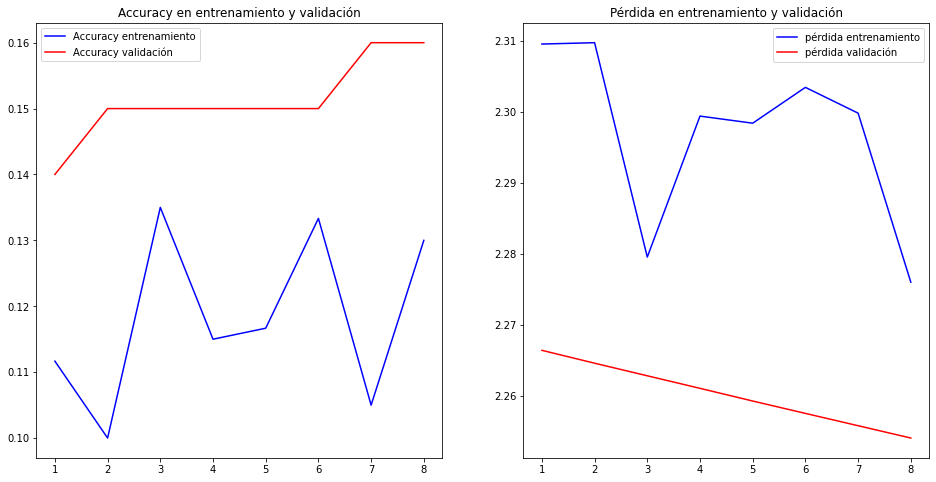

In [99]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.001) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD1R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD1R.history['loss']
val_loss = historyD1R.history['val_loss']
acc = historyD1R.history['accuracy']
val_acc = historyD1R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [100]:
print('pérdida en entrenamiento ', historyD1R.history['loss'][-1])
print('pérdida en validación    ', historyD1R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD1R.history['accuracy'][-1])
print('accuracy en validación   ', historyD1R.history['val_accuracy'][-1])

pérdida en entrenamiento  2.275989532470703
pérdida en validación     2.254051923751831
accuracy en entrenamiento 0.12999999523162842
accuracy en validación    0.1599999964237213


####2.5.4.2. Tasa de aprendizaje 0.1

Epoch 1/8
19/19 [==============================] - 1s 13ms/step - loss: 2.3077 - accuracy: 0.1517 - val_loss: 2.2206 - val_accuracy: 0.2400
Epoch 2/8
19/19 [==============================] - 0s 5ms/step - loss: 2.1121 - accuracy: 0.2700 - val_loss: 2.0623 - val_accuracy: 0.4000
Epoch 3/8
19/19 [==============================] - 0s 6ms/step - loss: 1.9319 - accuracy: 0.4400 - val_loss: 1.9232 - val_accuracy: 0.5100
Epoch 4/8
19/19 [==============================] - 0s 6ms/step - loss: 1.7644 - accuracy: 0.5517 - val_loss: 1.7838 - val_accuracy: 0.6200
Epoch 5/8
19/19 [==============================] - 0s 5ms/step - loss: 1.6140 - accuracy: 0.6400 - val_loss: 1.6546 - val_accuracy: 0.6500
Epoch 6/8
19/19 [==============================] - 0s 5ms/step - loss: 1.4717 - accuracy: 0.7033 - val_loss: 1.5343 - val_accuracy: 0.7000
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 1.3361 - accuracy: 0.7400 - val_loss: 1.4316 - val_accuracy: 0.7000
Epoch 8/8
4/4 [===========

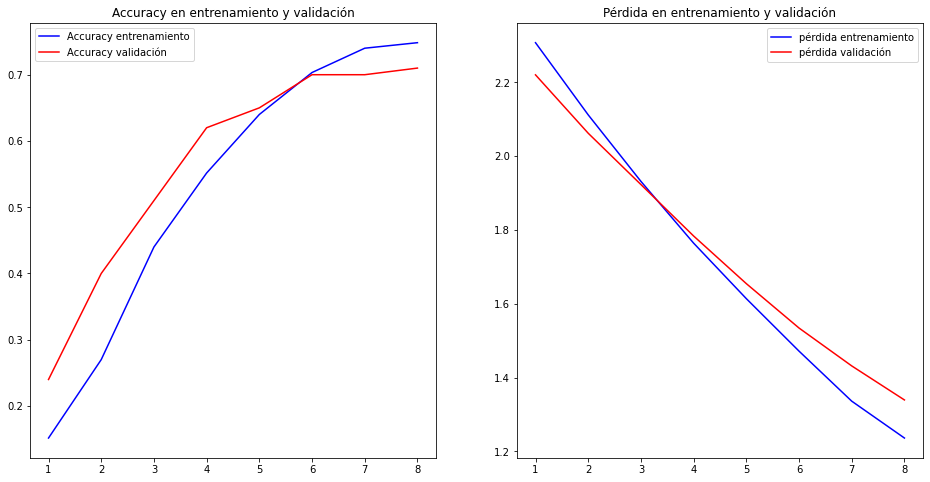

In [102]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.1) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD2R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD2R.history['loss']
val_loss = historyD2R.history['val_loss']
acc = historyD2R.history['accuracy']
val_acc = historyD2R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [103]:
print('pérdida en entrenamiento ', historyD2R.history['loss'][-1])
print('pérdida en validación    ', historyD2R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD2R.history['accuracy'][-1])
print('accuracy en validación   ', historyD2R.history['val_accuracy'][-1])

pérdida en entrenamiento  1.2361496686935425
pérdida en validación     1.3393769264221191
accuracy en entrenamiento 0.7483333349227905
accuracy en validación    0.7099999785423279


####2.5.4.3. Tasa de aprendizaje 0.5

Epoch 1/8
19/19 [==============================] - 1s 13ms/step - loss: 2.0104 - accuracy: 0.3267 - val_loss: 1.6482 - val_accuracy: 0.5600
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 1.3234 - accuracy: 0.7050 - val_loss: 1.2092 - val_accuracy: 0.7000
Epoch 3/8
19/19 [==============================] - 0s 6ms/step - loss: 0.9400 - accuracy: 0.7850 - val_loss: 1.0201 - val_accuracy: 0.7000
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 0.7200 - accuracy: 0.8450 - val_loss: 0.8639 - val_accuracy: 0.7500
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 0.5937 - accuracy: 0.8617 - val_loss: 0.7643 - val_accuracy: 0.7800
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.5235 - accuracy: 0.8700 - val_loss: 0.7094 - val_accuracy: 0.7800
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 0.4540 - accuracy: 0.8900 - val_loss: 0.6668 - val_accuracy: 0.8000
Epoch 8/8
4/4 [===========

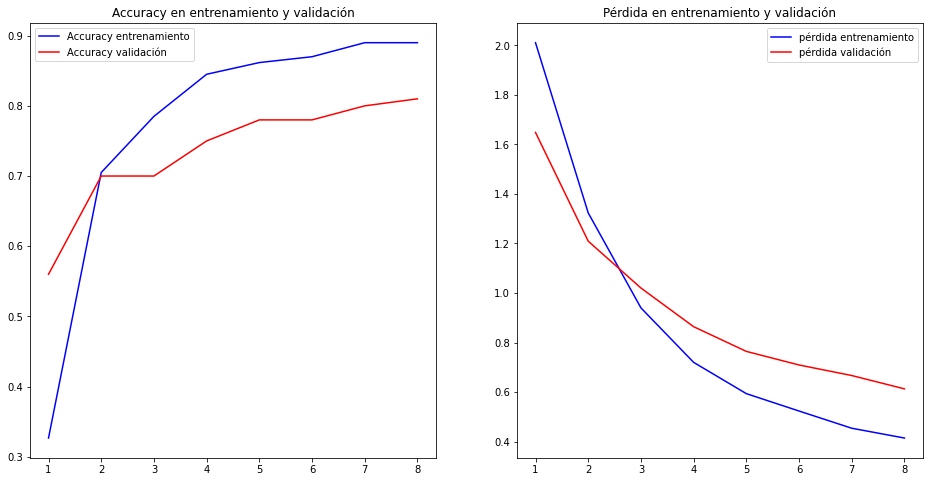

In [104]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD3R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD3R.history['loss']
val_loss = historyD3R.history['val_loss']
acc = historyD3R.history['accuracy']
val_acc = historyD3R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [105]:
print('pérdida en entrenamiento ', historyD3R.history['loss'][-1])
print('pérdida en validación    ', historyD3R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD3R.history['accuracy'][-1])
print('accuracy en validación   ', historyD3R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.4144463539123535
pérdida en validación     0.6129739284515381
accuracy en entrenamiento 0.8899999856948853
accuracy en validación    0.8100000023841858


####2.5.4.4. Tasa de aprendizaje 0.9

Epoch 1/8
19/19 [==============================] - 1s 10ms/step - loss: 1.7623 - accuracy: 0.5117 - val_loss: 1.2823 - val_accuracy: 0.6900
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 0.9562 - accuracy: 0.7683 - val_loss: 0.8517 - val_accuracy: 0.8100
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.8617 - val_loss: 0.7214 - val_accuracy: 0.7800
Epoch 4/8
19/19 [==============================] - 0s 4ms/step - loss: 0.4533 - accuracy: 0.8933 - val_loss: 0.6066 - val_accuracy: 0.8400
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 0.4042 - accuracy: 0.8983 - val_loss: 0.5640 - val_accuracy: 0.8200
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.3309 - accuracy: 0.9300 - val_loss: 0.4802 - val_accuracy: 0.8800
Epoch 7/8
19/19 [==============================] - 0s 5ms/step - loss: 0.2946 - accuracy: 0.9350 - val_loss: 0.4773 - val_accuracy: 0.8500
Epoch 8/8
4/4 [===========

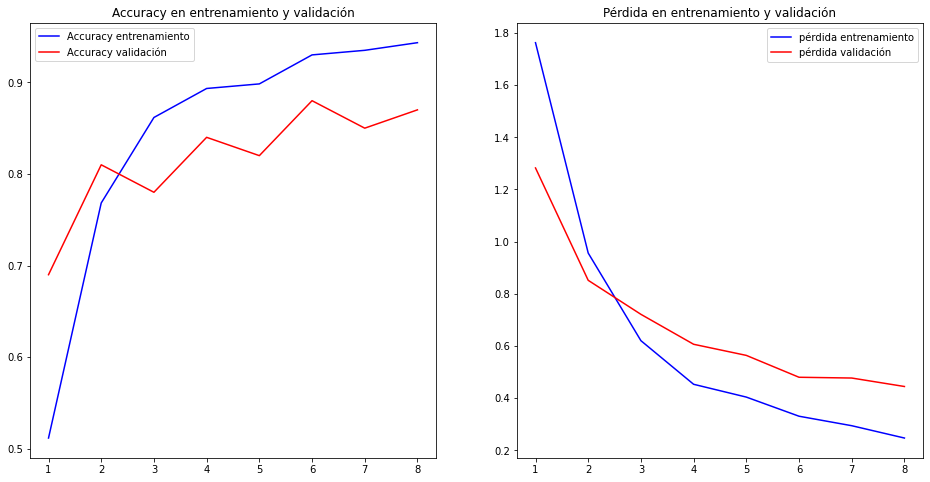

In [106]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=0.9) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD4R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD4R.history['loss']
val_loss = historyD4R.history['val_loss']
acc = historyD4R.history['accuracy']
val_acc = historyD4R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [107]:
print('pérdida en entrenamiento ', historyD4R.history['loss'][-1])
print('pérdida en validación    ', historyD4R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD4R.history['accuracy'][-1])
print('accuracy en validación   ', historyD4R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.24731744825839996
pérdida en validación     0.4448093771934509
accuracy en entrenamiento 0.9433333277702332
accuracy en validación    0.8700000047683716


####2.5.4.5. Tasa de aprendizaje 1.5

Epoch 1/8
19/19 [==============================] - 1s 12ms/step - loss: 1.4193 - accuracy: 0.5883 - val_loss: 0.9272 - val_accuracy: 0.7200
Epoch 2/8
19/19 [==============================] - 0s 4ms/step - loss: 0.6439 - accuracy: 0.8250 - val_loss: 0.5895 - val_accuracy: 0.8600
Epoch 3/8
19/19 [==============================] - 0s 4ms/step - loss: 0.4505 - accuracy: 0.8700 - val_loss: 0.5296 - val_accuracy: 0.8400
Epoch 4/8
19/19 [==============================] - 0s 5ms/step - loss: 0.3470 - accuracy: 0.9200 - val_loss: 0.4698 - val_accuracy: 0.8200
Epoch 5/8
19/19 [==============================] - 0s 4ms/step - loss: 0.2731 - accuracy: 0.9283 - val_loss: 0.3972 - val_accuracy: 0.8800
Epoch 6/8
19/19 [==============================] - 0s 4ms/step - loss: 0.2188 - accuracy: 0.9517 - val_loss: 0.3708 - val_accuracy: 0.8700
Epoch 7/8
19/19 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.9700 - val_loss: 0.3526 - val_accuracy: 0.8800
Epoch 8/8
4/4 [===========

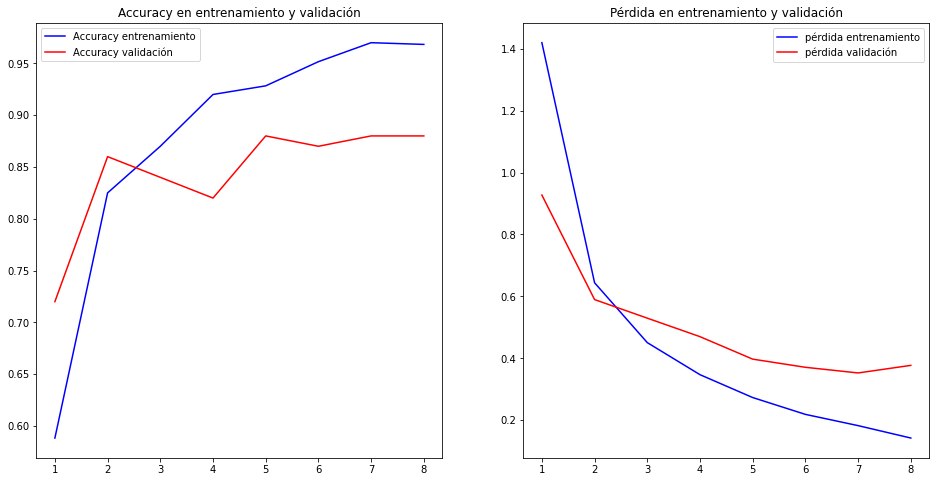

In [108]:
#Optimizador Adadelta
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = tf.keras.optimizers.Adadelta(learning_rate=1.5) #Cambiar el valor de la variable "learning_rate" para variar la tasa de aprendizaje
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

historyD5R=model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))
test_loss, test_accuracy = model.evaluate(x_test, y_test)

loss = historyD5R.history['loss']
val_loss = historyD5R.history['val_loss']
acc = historyD5R.history['accuracy']
val_acc = historyD5R.history['val_accuracy']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.plot(epochs, acc, 'b', label='Accuracy entrenamiento')
ax.plot(epochs, val_acc, 'r', label='Accuracy validación')
ax.set_title('Accuracy en entrenamiento y validación')
ax.legend()
ax1 = fig.add_subplot(1, 2, 2)
ax1.plot(epochs, loss, 'b', label='pérdida entrenamiento')
ax1.plot(epochs, val_loss, 'r', label='pérdida validación')
ax1.set_title('Pérdida en entrenamiento y validación')
ax1.legend()

In [109]:
print('pérdida en entrenamiento ', historyD5R.history['loss'][-1])
print('pérdida en validación    ', historyD5R.history['val_loss'][-1])
print('accuracy en entrenamiento', historyD5R.history['accuracy'][-1])
print('accuracy en validación   ', historyD5R.history['val_accuracy'][-1])

pérdida en entrenamiento  0.14235372841358185
pérdida en validación     0.3770364820957184
accuracy en entrenamiento 0.9683333039283752
accuracy en validación    0.8799999952316284


####2.5.4.6. Comparación optimizador Adadelta total vs dataset reducido

In [110]:
print('0.001', 'accuracy en entrenamiento Total', historyD1.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD1R.history['accuracy'][-1])
print('0.001','accuracy en validación Total  ', historyD1.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD1R.history['val_accuracy'][-1])
print('0.1', 'accuracy en entrenamiento Total', historyD2.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD2R.history['accuracy'][-1])
print('0.1','accuracy en validación Total  ', historyD2.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD2R.history['val_accuracy'][-1])
print('0.5', 'accuracy en entrenamiento Total', historyD3.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD3R.history['accuracy'][-1])
print('0.5','accuracy en validación Total  ', historyD3.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD3R.history['val_accuracy'][-1])
print('0.9', 'accuracy en entrenamiento Total', historyD4.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD4R.history['accuracy'][-1])
print('0.9','accuracy en validación Total  ', historyD4.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD4R.history['val_accuracy'][-1])
print('1.5', 'accuracy en entrenamiento Total', historyD5.history['accuracy'][-1], 'accuracy en entrenamiento Total', historyD5R.history['accuracy'][-1])
print('1.5','accuracy en validación Total  ', historyD5.history['val_accuracy'][-1], 'accuracy en validación reduc  ', historyD5R.history['val_accuracy'][-1])

0.001 accuracy en entrenamiento Total 0.6625666618347168 accuracy en entrenamiento Total 0.12999999523162842
0.001 accuracy en validación Total   0.7343000173568726 accuracy en validación reduc   0.1599999964237213
0.1 accuracy en entrenamiento Total 0.9452666640281677 accuracy en entrenamiento Total 0.7483333349227905
0.1 accuracy en validación Total   0.9516000151634216 accuracy en validación reduc   0.7099999785423279
0.5 accuracy en entrenamiento Total 0.9721333384513855 accuracy en entrenamiento Total 0.8899999856948853
0.5 accuracy en validación Total   0.9754999876022339 accuracy en validación reduc   0.8100000023841858
0.9 accuracy en entrenamiento Total 0.9780333042144775 accuracy en entrenamiento Total 0.9433333277702332
0.9 accuracy en validación Total   0.9779000282287598 accuracy en validación reduc   0.8700000047683716
1.5 accuracy en entrenamiento Total 0.9800500273704529 accuracy en entrenamiento Total 0.9683333039283752
1.5 accuracy en validación Total   0.979499995708

##3. Resultados

Después de desarrollar los optimizadores SGD, RSMpro, Adagrad y Adadelta con la utilización del dataset Mnist completo y con sólo el 1% de los datos, se obtuvo los siguientes resultados:


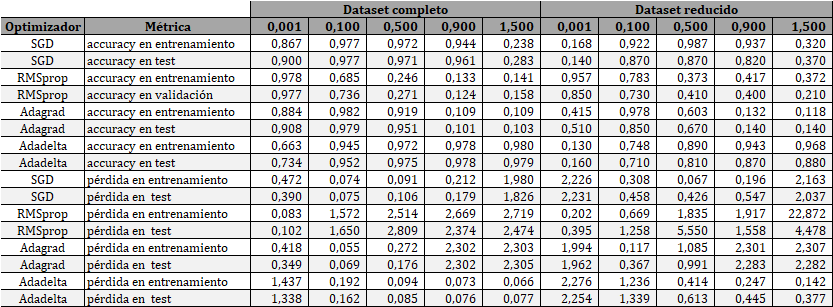


En general, se observa que con el dataset completo el optimizador que obtuvo un mejor desempeño respecto al accuracy fue el Adadelta, en especial con tasas de aprendizaje superiores a 0.1. El optimizador Adagrad obtuvo un buen resultado con una tasa de aprendizaje de 0,1; sin embargo, en promedio se observó un mejor comportamiento en todas las tasas de aprendizaje excepto la de 1.5 con el optimizador SGD.

3.1. ¿Cuál fue el método de optimización menos afectado por la reducción del conjunto de datos?

A nivel global, el método de optimización que obtuvo un mejor desempeño en cuanto a accuracy tomando en consideración todas las tasas de aprendizaje fue el Adadelta. Asimismo, el optimizador SGD tuvo resultados un poco mejores pero con una menor variación respecto a los valores obtenidos en el ejercicio actual.

El optimizador Adagrad, por su parte fue el más afectado con la reducción del conjunto de datos.

En general, los resultados del optimizador Adadelta son mejores despues de la reducción del conjunto de datos. sin embargo, en términos relativos en promedio el accuracy de validación obtuvo una reducción del 26% respecto al promedio obtenido con el conjunto de datos completo. Sin embargo, pese a tener un accuracy muy por debajo, el optimizador RMSprop tuvo un incremento del 15% respecto al primer ejercicio, en especial con las tasas de aprendizaje superiores a 0.5.

3.2. ¿Cuál fue la tasa de aprendizaje menos afectada por la reducción del conjunto de datos?

Tomando en consideración todos los optimizadores, se observa que con una tasa de aprendizaje baja del 0.001 la reducción de datos se vio muy afectada, el accuracy paso de un promedio de 0.88 a 0.415. 

Con una tasa de aprendizaje de 0.1 se obtuvieron resultados más constantes entre el primer ejercicio y la reducción de los datos.

Sin embargo, si bien la métrica de accuracy fue inferior a otros optimizadores, se observa un incremento promedio del %5 respecto al ejercicio inicial con una tasa de aprendizaje de 1.5.


3.3. ¿Cuál fue el método que más rápido convergió?


Antes de efectuar la reducción de datos, el optimizador que convergió más rápido fue el Asadelta, asimismo, después de la reducción de los datos, este optimizador siguió convergiendo más rápido con unas tasas de aprendizade de 0.9 y 1.5.

##4. Referencias

https://www.ellaberintodefalken.com/2019/10/clasificacion-deep-learning-keras.html

https://www.tensorflow.org/tutorials/keras/classification?hl=es-419

https://programmerclick.com/article/2432913113/

https://github.com/keras-team/keras/issues/6444

https://velascoluis.medium.com/optimizadores-en-redes-neuronales-profundas-un-enfoque-pr%C3%A1ctico-819b39a3eb5